[Brazilian E-Commerce Public Dataset by Olist | Kaggle](https://www.kaggle.com/olistbr/brazilian-ecommerce)

[Olist-ecommerce 2017-2018 (EDA) | Kaggle](https://www.kaggle.com/luisenrique18/olist-ecommerce-2017-2018-eda)

<h3>2.1.1. Data Overview</h3>


The data is divided in multiple datasets for better understanding and organization. 

<img src="https://i.ibb.co/RhqCYmR/68747470733a2f2f692e696d6775722e636f6d2f485268643259302e706e67.png" alt="68747470733a2f2f692e696d6775722e636f6d2f485268643259302e706e67" border="0">


<h2>2.1.2. Data Description</h2>


Each feature or columns of different csv files are described below:

* The  `olist_customers_dataset.csv` contain following features:

Feature | Description 
----------|---------------
**customer_id** | Id of the consumer who made the purchase.
**customer_unique_id**    | Unique Id of the consumer.
**customer_zip_code_prefix** | Zip Code of the location of the consumer.
**customer_city** | Name of the City from where order is made.
**customer_state** |  State Code from where order is made(Ex- sao paulo-SP).

* The `olist_sellers_dataset.csv` contains following features:

Feature | Description 
----------|---------------
**seller_id** |   Unique Id of the seller registered in olist.
**seller_zip_code_prefix** | Zip Code of the location of the seller.
**seller_city** | Name of the City of the seller.
**seller_state** | State Code (Ex- sao paulo-SP)


* The `olist_order_items_dataset.csv`  contain following features:

Feature | Description 
----------|---------------
**order_id** | A unique id of order made by the consumers.
**order_item_id** | A Unique id given to each item ordered in the order.
**product_id** |A unique id given to each product available on the site.
**seller_id** | Unique Id of the seller registered in olist.
**shipping_limit_date** | The date before which shipping of the ordered    product must be completed.
**price** | Actual price of the products ordered .
**freight_value** | Price rate at which a product is delivered from one point to another. 

* The `olist_order_payments_dataset.csv` contain following features:

Feature | Description 
----------|---------------
**order_id** | A unique id of order made by the consumers.
**payment_sequential** | sequences of the payments made in case of EMI.
**payment_type** |  mode of payment used.(Ex-Credit Card)
**payment_installments** | number of installments in case of EMI purchase.
**payment_value** | Total amount paid for the purshase order.



* The `olist_orders_dataset.csv`  contain following features:

Feature | Description 
----------|---------------
**order_id** | A unique id of order made by the consumers.
**customer_id** | Id of the consumer who made the purchase.
**order_status** | status of the order made i.e delivered, shipped etc.
**order_purchase_timestamp** | Timestamp of the purchase.
**order_approved_at** | Timestamp of the order approval.
**order_delivered_carrier_date** | delivery date at which carrier made the delivery.
**order_delivered_customer_date** | date at which customer got the product.
**order_estimated_delivery_date** | estimated delivery date of the products.


* The `olist_order_reviews_dataset.csv`  contain following features:

Feature | Description 
----------|---------------
**review_id** |Id of the review given on the product ordered by the order id.
**order_id** |  A unique id of order made by the consumers.
**review_score** | review score given by the customer for each order on the scale of 1–5. 
**review_comment_title** | Title of the review
**review_comment_message** | Review comments posted by the consumer for each order.
**review_creation_date** |Timestamp of the review when it is created.
**review_answer_timestamp** | Timestamp of the review answered.


* The `olist_products_dataset.csv` contain following features:

Feature | Description 
----------|---------------
**product_id** | A unique identifier for the proposed project.
**product_category_name** | Name of the product category
**product_name_lenght** | length of the string which specify the name given to the products ordered.
**product_description_lenght** | length of the description written for each product ordered on the site.
**product_photos_qty** | Number of photos of each product ordered available on the shopping portal.
**product_weight_g** | Weight of the products ordered in grams.
**product_length_cm** | Length of the products ordered in centimeters.
**product_height_cm** | Height of the products ordered in centimeters.
**product_width_cm** | width of the product ordered in centimeters.






### 2.2 Mapping the real world problem to an ML problem 
* Here, the objective is to predict the customer satisfaction score for a given order based on the given features like price, item description, on time delivery, delivery status etc.



* The given problem can be solved as either by multiclass classification problem(predict score [1,2,3,4,5] ), binary classification problem(0 as negative of 1 as positive)  or Regression problem(for predicting scores)

2.2 실제 문제를 ML 문제에 매핑

여기에서 목표는 가격, 품목 설명, 정시 배송, 배송 상태 등과 같은 주어진 기능을 기반으로 주어진 주문에 대한 고객 만족도 점수를 예측하는 것입니다.

주어진 문제는 다중 클래스 분류 문제(predict score [1,2,3,4,5] ), 이진 분류 문제(0은 음수, 1은 양수) 또는 회귀 문제(점수 예측용)로 해결할 수 있습니다.

# 탐색적 데이터 분석

In [1]:
# Importing Libraries

# Standard libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.gridspec import GridSpec
pd.set_option('display.max_columns', 100)
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
import json
import requests
import folium
import opendatasets as od
from datetime import datetime
import calendar
from pandas.api.types import CategoricalDtype
import warnings
warnings.filterwarnings("ignore")

from wordcloud import WordCloud
from collections import Counter
from PIL import Image


# # Utilities
# from viz_utils import *
# from custom_transformers import *
# from ml_utils import *

# import tensorflow_hub as hub
# from object_detection.utils import visualization_utils as viz_utils

# DataPrep
import re
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import joblib

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb

In [2]:
# #Downloading Data from Kaggle

# download_url = 'https://www.kaggle.com/olistbr/brazilian-ecommerce/download'

# od.download(download_url)

In [3]:
%ls data

archive.zip                            olist_order_reviews_dataset.csv
olist_customers_dataset.csv            olist_orders_dataset.csv
olist_geolocation_dataset.csv          olist_products_dataset.csv
olist_order_items_dataset.csv          olist_sellers_dataset.csv
olist_order_payments_dataset.csv       product_category_name_translation.csv


## 데이터 정리 및 전처리

In [4]:
#reading datas
import time
start = time.time()
data = pd.read_csv("data/olist_customers_dataset.csv")
geo_data = pd.read_csv("data/olist_geolocation_dataset.csv")
order_itemdata = pd.read_csv("data/olist_order_items_dataset.csv")
pay_data = pd.read_csv("data/olist_order_payments_dataset.csv")
rev_data = pd.read_csv("data/olist_order_reviews_dataset.csv")
orders = pd.read_csv("data/olist_orders_dataset.csv")
order_prddata = pd.read_csv("data/olist_products_dataset.csv")
order_selldata = pd.read_csv("data/olist_sellers_dataset.csv")
order_prd_catdata = pd.read_csv("data/product_category_name_translation.csv")
end = time.time()
print("reading time: ",(end-start),"sec")

reading time:  5.980590105056763 sec


In [5]:
#checking number of columns , column_names and no_of_rows

datasets = [data,geo_data,order_itemdata, pay_data, orders, order_prddata,rev_data,order_selldata, order_prd_catdata]
titles = ["customers","geolocations","items", "payments", "orders", "products","reviews","sellers","category_translation"]



info_df = pd.DataFrame({},)
info_df['dataset']= titles

info_df['no_of_columns']= [len(df.columns) for df in datasets ]
info_df['columns_name']= [', '.join(list(df.columns)) for df in datasets] 
info_df['no_of_rows'] = [len(df) for df in datasets]

info_df.style.background_gradient(cmap='Greys')

,dataset,no_of_columns,columns_name,no_of_rows
0,customers,5,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",99441
1,geolocations,5,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",1000163
2,items,7,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",112650
3,payments,5,"order_id, payment_sequential, payment_type, payment_installments, payment_value",103886
4,orders,8,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",99441
5,products,9,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",32951
6,reviews,7,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",99224
7,sellers,4,"seller_id, seller_zip_code_prefix, seller_city, seller_state",3095
8,category_translation,2,"product_category_name, product_category_name_english",71


In [6]:
#checking dtypes
datasets = [data,geo_data,order_itemdata, pay_data, orders, order_prddata,rev_data,order_selldata, order_prd_catdata]
titles = ["customers","geolocations","items", "payments", "orders", "products","reviews","sellers","category_translation"]

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
new_df = pd.DataFrame({},)
new_df['dataset']= titles

new_df['numeric_features'] = [len((df.select_dtypes(include=numerics)).columns) for df in datasets]
new_df['num_features_name'] = [', '.join(list((df.select_dtypes(include=numerics)).columns)) for df in datasets]
new_df['object_features'] = [len((df.select_dtypes(include='object')).columns) for df in datasets]
new_df['objt_features_name'] = [', '.join(list((df.select_dtypes(include='object')).columns)) for df in datasets]
new_df['bool_features'] = [len((df.select_dtypes(include='bool')).columns) for df in datasets]
new_df.style.background_gradient(cmap='Greys')


,dataset,numeric_features,num_features_name,object_features,objt_features_name,bool_features
0,customers,1,customer_zip_code_prefix,4,"customer_id, customer_unique_id, customer_city, customer_state",0
1,geolocations,3,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng",2,"geolocation_city, geolocation_state",0
2,items,3,"order_item_id, price, freight_value",4,"order_id, product_id, seller_id, shipping_limit_date",0
3,payments,3,"payment_sequential, payment_installments, payment_value",2,"order_id, payment_type",0
4,orders,0,,8,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",0
5,products,7,"product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",2,"product_id, product_category_name",0
6,reviews,1,review_score,6,"review_id, order_id, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",0
7,sellers,1,seller_zip_code_prefix,3,"seller_id, seller_city, seller_state",0
8,category_translation,0,,2,"product_category_name, product_category_name_english",0


In [7]:
#checking no of null values
#code source-https://www.kaggle.com/fayhosseini/brazilian-e-commerce-eda-for-beginners

datasets = [data,geo_data,order_itemdata, pay_data, orders, order_prddata,rev_data,order_selldata, order_prd_catdata]
titles = ["customers","geolocations","items", "payments", "orders", "products","reviews","sellers","category_translation"]

info_df_n = pd.DataFrame({},)

info_df_n['dataset']= titles

#creating column of name of columns in the dataset 
info_df_n['cols'] = [', '.join([col for col, null in df.isnull().sum().items() ]) for df in datasets]

#creating total number of columns in the dataset 
info_df_n['cols_no']= [df.shape[1] for df in datasets]

#counting total null values
info_df_n['null_no']= [df.isnull().sum().sum() for df in datasets]

#creating total number of columns in the dataset with null-values 
info_df_n['null_cols_no']= [len([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]

#creating column of name of columns in the dataset with null-values 
info_df_n['null_cols'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]


info_df_n.style.background_gradient(cmap='Greys')

,dataset,cols,cols_no,null_no,null_cols_no,null_cols
0,customers,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",5,0,0,
1,geolocations,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",5,0,0,
2,items,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",7,0,0,
3,payments,"order_id, payment_sequential, payment_type, payment_installments, payment_value",5,0,0,
4,orders,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",8,4908,3,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
5,products,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",9,2448,8,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
6,reviews,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",7,145903,2,"review_comment_title, review_comment_message"
7,sellers,"seller_id, seller_zip_code_prefix, seller_city, seller_state",4,0,0,
8,category_translation,"product_category_name, product_category_name_english",2,0,0,


- 리뷰 데이터 세트에 있는 최대 null 값 수와 null 값이 있는 열의 이름은 review_comment_title 및 review_comment_message

- 제품 데이터 세트에는 가장 적은 수의 null 값이 포함되어 있지만 대부분의 열에는 null 값이 있음

### 모든 데이터세트 병합

In [8]:
rev_new = rev_data.drop(['review_comment_title','review_creation_date','review_id','review_answer_timestamp'],axis=1)

In [9]:
df = pd.merge(orders,pay_data, on="order_id")
df = df.merge(data, on="customer_id")
df = df.merge(order_itemdata, on="order_id")
df = df.merge(order_prddata, on="product_id")
df = df.merge(order_prd_catdata, on="product_category_name")
df = df.merge(rev_new, on="order_id")
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_score,review_comment_message
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,credit_card,3,37.77,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,Deveriam embalar melhor o produto. A caixa vei...
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,credit_card,1,37.77,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,5,"Só achei ela pequena pra seis xícaras ,mais é ..."


In [10]:
print("Number of rows after merging:",len(df))
print("Number of columns after merging:",len(df.columns))

Number of rows after merging: 115609
Number of columns after merging: 33


###  결측값 처리

In [11]:
df.isnull().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                   14
order_delivered_carrier_date      1195
order_delivered_customer_date     2400
order_estimated_delivery_date        0
payment_sequential                   0
payment_type                         0
payment_installments                 0
payment_value                        0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date                  0
price                                0
freight_value                        0
product_category_name                0
product_name_lenght                  0
product_description_lenght           0
product_photos_qty       

타임스탬프에서 누락된 값 처리

- 다양한 유형의 타임스탬프 순서 : order_purchase_timestamp-->order_approved_at--> order_delivered_carrier_date-->order_delivered_customer_date-->order_estimated_delivery_date

- 누락된 값이 포함된 타임스탬프 : order_approved_at, order_delivered_carrier_date, order_delivered_customer_date

- order_approved_at의 null 값은 order_purchase_timestamp로 대체
- order_delivered_customer_date의 null 값은 order_estimated_delivery_date로 대체
- order_delivered_carrier_date 열을 삭제

In [12]:
#Handling missing values
index = (df[df['order_delivered_customer_date'].isnull() == True].index.values)

df["order_approved_at"].fillna(df["order_purchase_timestamp"], inplace=True)
df["order_delivered_customer_date"].fillna(df["order_estimated_delivery_date"], inplace=True)

#dropping order delivery carrier date
df.drop(labels='order_delivered_carrier_date',axis=1,inplace=True)

In [13]:
#checking the replaced values
df.order_estimated_delivery_date[index[0]]

'2017-07-06 00:00:00'

In [14]:
df.order_delivered_customer_date[index[0]]

'2017-07-06 00:00:00'

In [15]:
# Handling missing values of numerical features
df['product_weight_g'].fillna(df['product_weight_g'].median(),inplace=True)
df['product_length_cm'].fillna(df['product_length_cm'].median(),inplace=True)
df['product_height_cm'].fillna(df['product_height_cm'].median(),inplace=True)
df['product_width_cm'].fillna(df['product_width_cm'].median(),inplace=True)

In [16]:
#Handling missing values of text column
print("Percentage of null reviews :",(df.review_comment_message.isnull().sum()/len(df))*100 ,"%")
# filling null value of review comments with no_review
df['review_comment_message'].fillna('nao_reveja',inplace=True)

Percentage of null reviews : 57.697065107387836 %


### 데이터 중복 제거

In [17]:
dup_rows = df[df.duplicated(['order_id','customer_id','order_purchase_timestamp','order_delivered_customer_date','customer_unique_id','review_comment_message'])]
dup_rows.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_score,review_comment_message
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
8,82bce245b1c9148f8d19a55b9ff70644,388025bec8128ff20ec1a316ed4dcf02,delivered,2017-04-20 17:15:46,2017-04-21 05:15:56,2017-05-10 09:17:55,2017-05-12 00:00:00,1,boleto,1,267.80,f9effeed3df9ae063a58c0759b96f8b2,85804,cascavel,PR,2,a5a0e71a81ae65aa335e71c06261e260,c8417879a15366a17c30af34c798c332,2017-04-27 05:15:56,38.00,15.56,utilidades_domesticas,57.0,698.0,3.0,705.0,34.0,22.0,28.0,housewares,1,nao_reveja
9,82bce245b1c9148f8d19a55b9ff70644,388025bec8128ff20ec1a316ed4dcf02,delivered,2017-04-20 17:15:46,2017-04-21 05:15:56,2017-05-10 09:17:55,2017-05-12 00:00:00,1,boleto,1,267.80,f9effeed3df9ae063a58c0759b96f8b2,85804,cascavel,PR,3,a5a0e71a81ae65aa335e71c06261e260,c8417879a15366a17c30af34c798c332,2017-04-27 05:15:56,38.00,15.56,utilidades_domesticas,57.0,698.0,3.0,705.0,34.0,22.0,28.0,housewares,1,nao_reveja
10,82bce245b1c9148f8d19a55b9ff70644,388025bec8128ff20ec1a316ed4dcf02,delivered,2017-04-20 17:15:46,2017-04-21 05:15:56,2017-05-10 09:17:55,2017-05-12 00:00:00,1,boleto,1,267.80,f9effeed3df9ae063a58c0759b96f8b2,85804,cascavel,PR,4,a5a0e71a81ae65aa335e71c06261e260,c8417879a15366a17c30af34c798c332,2017-04-27 05:15:56,38.00,15.56,utilidades_domesticas,57.0,698.0,3.0,705.0,34.0,22.0,28.0,housewares,1,nao_reveja


In [18]:
#Deduplication of entries
df= df.drop_duplicates(subset={'order_id','customer_id','order_purchase_timestamp','order_delivered_customer_date'}, keep='first', inplace=False)
df=df.reindex()
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_score,review_comment_message
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-18 14:44:43,2017-08-28 00:00:00,1,credit_card,3,37.77,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,Deveriam embalar melhor o produto. A caixa vei...
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-07 18:30:01,2017-08-15 00:00:00,1,credit_card,1,37.77,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,5,"Só achei ela pequena pra seis xícaras ,mais é ..."
5,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-11-07 18:04:59,2017-11-13 00:00:00,1,boleto,1,44.09,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,3,nao_reveja
6,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-28 18:59:23,2017-12-21 00:00:00,1,credit_card,10,356.12,3e4fd73f1e86b135b9b121d6abbe9597,19400,presidente venceslau,SP,1,be021417a6acb56b9b50d3fd2714baa8,f5f46307a4d15880ca14fab4ad9dfc9b,2017-11-30 00:21:09,339.00,17.12,utilidades_domesticas,48.0,664.0,6.0,14300.0,38.0,34.0,34.0,housewares,1,"Inicialmente, na data da compra o produto era ..."


In [19]:
print("Number of rows after dedublication:",len(df))
print("Number of columns after deduplication:",len(df.columns))

Number of rows after dedublication: 96516
Number of columns after deduplication: 32


## 데이터 분석

### 높은 수준의 통계

In [20]:
# all time stamps are in object dtype as observed above converting it into dataetime 
df[['order_purchase_timestamp','order_approved_at','order_delivered_customer_date','order_estimated_delivery_date',]]=df[['order_purchase_timestamp',
       'order_approved_at','order_delivered_customer_date','order_estimated_delivery_date']].apply(pd.to_datetime)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96516 entries, 0 to 115608
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96516 non-null  object        
 1   customer_id                    96516 non-null  object        
 2   order_status                   96516 non-null  object        
 3   order_purchase_timestamp       96516 non-null  datetime64[ns]
 4   order_approved_at              96516 non-null  datetime64[ns]
 5   order_delivered_customer_date  96516 non-null  datetime64[ns]
 6   order_estimated_delivery_date  96516 non-null  datetime64[ns]
 7   payment_sequential             96516 non-null  int64         
 8   payment_type                   96516 non-null  object        
 9   payment_installments           96516 non-null  int64         
 10  payment_value                  96516 non-null  float64       
 11  customer_uniqu

- 최종 병합된 데이터세트에는 null 값이 없음
- 총 열 수는 32
- dtype | number of columns ----------------|------------------- datetime64[ns] | 4 | float64(10) | 10 | int64 | 5 | object | 13

In [22]:
df.describe()

,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score
count,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000
mean,1.022545,2.919858,157.924421,35163.974543,1.016205,125.777851,20.220468,48.846253,794.118188,2.251015,2106.227133,30.147955,16.507771,23.061855,4.107412
std,0.247935,2.711997,216.773702,29810.746531,0.145692,189.535209,15.931328,9.995674,654.863686,1.746647,3764.648279,16.154906,13.339701,11.744019,1.329213
min,1.000000,0.000000,0.010000,1003.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000
25%,1.000000,1.000000,60.065000,11368.750000,1.000000,41.900000,13.300000,42.000000,349.000000,1.000000,300.000000,18.000000,8.000000,15.000000,4.000000
50%,1.000000,2.000000,103.190000,24422.000000,1.000000,79.000000,16.390000,52.000000,607.000000,2.000000,700.000000,25.000000,13.000000,20.000000,5.000000
75%,1.000000,4.000000,175.392500,59015.000000,1.000000,139.900000,21.260000,57.000000,996.000000,3.000000,1813.000000,38.000000,20.000000,30.000000,5.000000
max,27.000000,24.000000,13664.080000,99980.000000,7.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,5.000000


- customer_zip_code_prefix, order_item_id 및 review_score 기능을 제외하고 최종 데이터 세트에 12개의 숫자 기능이 있음

- payment_value의 경우 주문의 최대 지불 값은 13664 Brazilian real

- 주문의 가격 및 운임 값에서 주문의 최대 가격은 6735이고 최대 화물은 약 410 Brazilian real. 주문의 평균 가격은 약 125 Brazilian real이고 운임 가격은 약 20 Brazilian real. 최소 가격의 주문은 0.85 Brazilian real.

In [23]:
# checking the target variables i.e review score 
df.review_score.value_counts()

5    56185
4    18732
1    10598
3     7978
2     3023
Name: review_score, dtype: int64

In [24]:
# def partition(x):
#     if x < 3:
#         return 0
#     return 1
# df['review_score']=df['review_score'].map(lambda cw : partition(cw) ) 
    
# # checking the review score now
# df.review_score.value_counts()

In [25]:
# #counting the review score with 1 and 0
# y_value_counts = df.review_score.value_counts()

# #calculating the percentage of each review type
# print("Total Positive Reviews :", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
# print("Total Negative Reviews :", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
# print('\n')

# #plotting bar-plot and pie chart
# %matplotlib inline
# sns.set_style("whitegrid")
# plt.figure(figsize=(14,5))
# plt.subplot(1,2,1)
# plt.ylabel('Total Reviews')
# plt.xlabel('Label')
# plt.title('Negative Vs Positive Reviews',color='dimgrey')
# plt.xticks([10,10.20],['0','1'])
# #creating bar plots
# plt.bar(10,14112, color = 'grey', width = 0.15,alpha=0.7,label='negative',edgecolor='black')
# plt.bar(10.20,83143,color = '#2e4884', width = 0.15,alpha=0.9,label='positive',edgecolor='black')
# plt.legend()

# plt.subplot(1,2,2)
# labels = ['Positive','Negative']
# sizes = [83143,14112]
# explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
# color={'#2e4884','grey'}
# plt.pie(sizes,explode=explode ,colors=color,labels=labels, autopct='%1.1f%%',shadow=False, startangle=0,radius=1.5,labeldistance=1.1,textprops={'fontsize': 14},frame=True, )
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.title('Pie Chart for review score',color='dimgrey')
# plt.show()

In [26]:
def partition(x):
    if x < 3:
        return 0
    elif x == 3:
        return 1
    else :
        return 2
df['review_score']=df['review_score'].map(lambda cw : partition(cw) ) 
    
# checking the review score now
df.review_score.value_counts()

2    74917
0    13621
1     7978
Name: review_score, dtype: int64

Total Positive Reviews : 74917 , ( 346.85402101949165 %)
Total Neutral Reviews : 7978 , ( 36.93689522663086 %)
Total Negative Reviews : 13621 , ( 63.06310477336914 %)




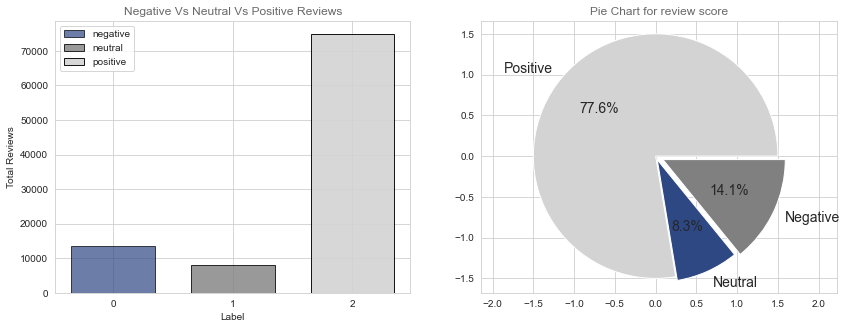

In [27]:
#counting the review score with 1 and 0
y_value_counts = df.review_score.value_counts()

#calculating the percentage of each review type
print("Total Positive Reviews :", y_value_counts[2], ", (", (y_value_counts[2]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Total Neutral Reviews :", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Total Negative Reviews :", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print('\n')

#plotting bar-plot and pie chart
%matplotlib inline
sns.set_style("whitegrid")
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.ylabel('Total Reviews')
plt.xlabel('Label')
plt.title('Negative Vs Neutral Vs Positive Reviews',color='dimgrey')
plt.xticks([10,10.10,10.20],['0','1','2'])
#creating bar plots
plt.bar(10,13621, color = '#2e4884', width = 0.07, alpha=0.7, label='negative', edgecolor='black')
plt.bar(10.10,7978, color = 'gray', width = 0.07, alpha=0.8, label='neutral', edgecolor='black')
plt.bar(10.20,74917, color = 'lightgray', width = 0.07, alpha=0.9, label='positive', edgecolor='black')
plt.legend()

plt.subplot(1,2,2)
# 각 영역의 비율과 이름을 ratio와 labels로 지정
ratio = [74917,7978,13621]
labels = ['Positive','Neutral', 'Negative']
# explode는 부채꼴이 파이 차트의 중심에서 벗어나는 정도를 설정
explode = (0, 0.05, 0.1)
# colors를 사용하면 각 영역의 색상을 자유롭게 지정
color={'#2e4884','lightgray','gray'}
# # wedgeprops는 부채꼴 영역의 스타일을 설정
# wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
# autopct는 부채꼴 안에 표시될 숫자의 형식을 지정 -> 소수점 한자리까지 표시하도록 설정
# startangle는 부채꼴이 그려지는 시작 각도를 설정 : 디폴트는 0도 (양의 방향 x축)
# counterclock=False로 설정하면 시계 방향 순서로 부채꼴 영역이 표시
# shadow를 True로 설정하면, 파이 차트에 그림자가 표시
plt.pie(ratio,explode=explode ,colors=color,labels=labels, autopct='%1.1f%%',shadow=False, startangle=0,radius=1.5,labeldistance=1.1,textprops={'fontsize': 14},frame=True, )
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie Chart for review score',color='dimgrey')
plt.show()

In [28]:
#Correlation matrix 
corr_matrix = df.corr()

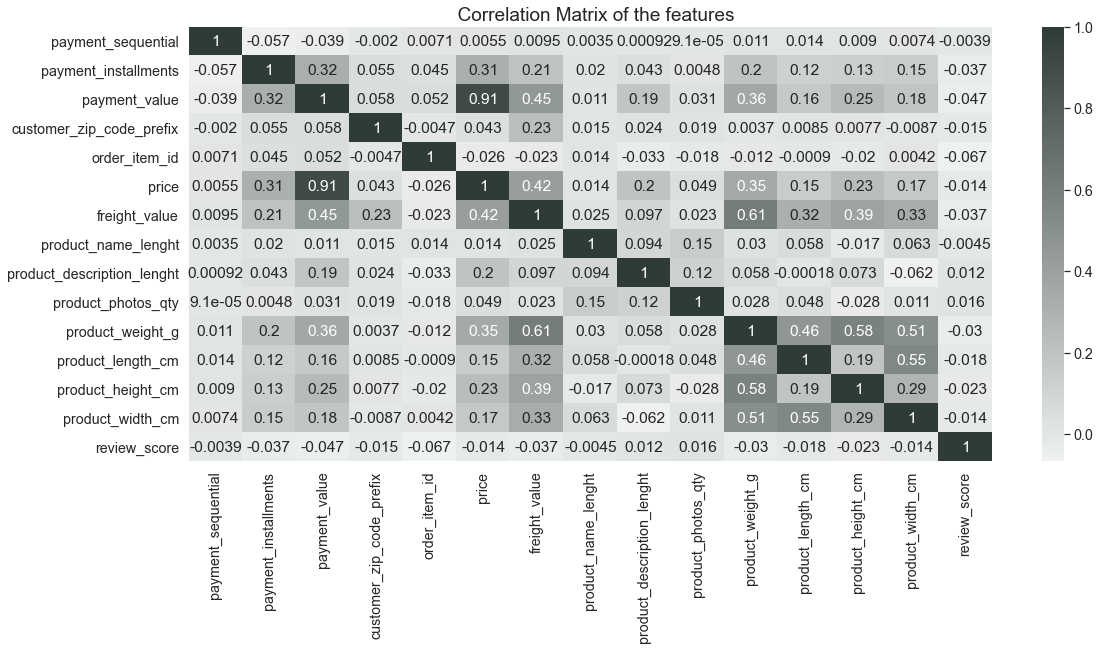

In [29]:
plt.figure(figsize=(18,8))
sns.set(font_scale=1.3)
cmap = sns.light_palette("#2f3b39",as_cmap=True)
sns.heatmap(corr_matrix, cmap=cmap,annot=True)
plt.title("  Correlation Matrix of the features",fontsize=19)
plt.savefig('plot16.png', dpi=300, bbox_inches='tight')
plt.show()

(payment_value 및 price), (product_weight_g 및 freight_value 와 product_width_cm), (product_length_cm 및 product_width_cm), (product_height_cm 및 product_weight_g) 사이에는 강한 양의 상관관계가 있음

In [30]:
#finding corr- values of the features with review_score
corr_matrix["review_score"].sort_values(ascending=False)

review_score                  1.000000
product_photos_qty            0.016331
product_description_lenght    0.012488
payment_sequential           -0.003902
product_name_lenght          -0.004465
price                        -0.013776
product_width_cm             -0.014243
customer_zip_code_prefix     -0.014910
product_length_cm            -0.018169
product_height_cm            -0.022854
product_weight_g             -0.029947
payment_installments         -0.036783
freight_value                -0.037223
payment_value                -0.047393
order_item_id                -0.067082
Name: review_score, dtype: float64

In [31]:
#checking unique ids
print("Total number of unique seller_id:",len((df.seller_id).unique()))
print("Total number of unique product_id:",len((df.product_id).unique()))
print("Total number of unique customer_id:",len((df.customer_unique_id).unique()))

Total number of unique seller_id: 3017
Total number of unique product_id: 30905
Total number of unique customer_id: 93396


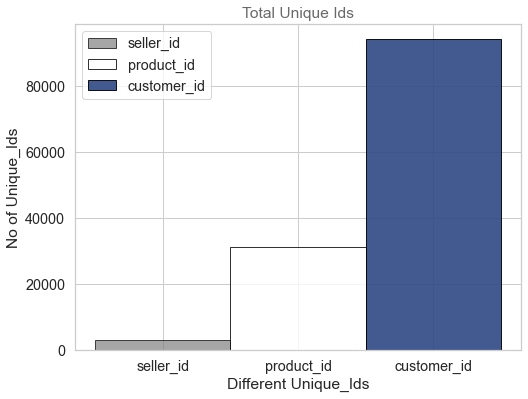

In [32]:
%matplotlib inline
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
plt.ylabel('No of Unique_Ids')
plt.xlabel('Different Unique_Ids')
plt.title('Total Unique Ids',color='dimgrey')
plt.xticks([10,10.25,10.50],['seller_id','product_id','customer_id'])
#creating bar plots
plt.bar(10,3022, color = 'grey', width = 0.25,alpha=0.7,label='seller_id',edgecolor='black')
plt.bar(10.25,31053, color = 'white', width = 0.25,alpha=0.8,label='product_id',edgecolor='black')
plt.bar(10.50,94087, color = '#2e4884', width = 0.25,alpha=0.9,label='customer_id',edgecolor='black')
plt.legend()
plt.show()

### Uivariate 분석: 지불 유형

In [33]:
df.groupby('payment_type').size()

payment_type
boleto         19203
credit_card    73251
debit_card      1484
voucher         2578
dtype: int64

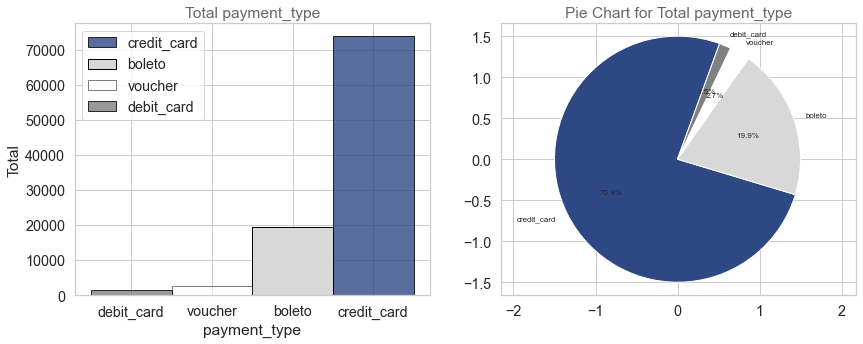

In [34]:
%matplotlib inline
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.ylabel('Total')
plt.xlabel('payment_type')
plt.title('Total payment_type',color='dimgrey')
plt.xticks([10,10.25,10.50,10.75],['debit_card','voucher','boleto','credit_card'])
#creating bar plots
plt.bar(10.75,73816, color = '#2e4884', width = 0.25,alpha=0.8,label='credit_card',edgecolor='black')
plt.bar(10.50,19345, color = '#d8d8d8', width = 0.25,label='boleto',edgecolor='black')
plt.bar(10.25,2604, color = 'white', width = 0.25,alpha=0.5,label='voucher',edgecolor='black')
plt.bar(10,1490, color = 'grey', width = 0.25,alpha=0.8,label='debit_card',edgecolor='black')



plt.legend()

plt.subplot(1,2,2)
s= [ 73816,19345, 2604,1490]
new = ['credit_card','boleto','voucher','debit_card']

explode = (0, 0, 0,0)  
colours = {'credit_card': '#2e4884',
           'boleto': '#d8d8d8',
           'voucher': 'w',
           'debit_card': 'grey'}

color ={'#2e4884','grey','#d8d8d8','w'}



plt.pie(s, explode=explode, labels=new,colors=[colours[key] for key in new] , autopct='%1.1f%%',shadow=False, startangle=70,radius=1.5,frame=True,textprops={'fontsize': 8})
plt.axis('equal') 
plt.title('Pie Chart for Total payment_type',color='dimgrey')
plt.show()

* Baleto ==> Boleto Bancário, 간단히 Boleto(영어: 티켓)라고 하는 것은 FEBRABAN에서 규제하는 브라질의 지불 방법으로, Brazil Federation of Banks 의 약자. ATM, 지점 시설 및 인터넷 뱅킹에서 지불할 수 있음. 은행, 우체국, 복권 대리점 및 일부 슈퍼마켓은 마감일까지.

- 대부분의 주문이 신용 카드를 사용하여 지불되고 두 번째로 많이 사용되는 지불 방법은 boleto

- 신용카드를 75.9%, baleto를 19.9%, 바우처와 체크카드는 4.2%를 사용.

In [35]:
temp = pd.DataFrame(df.groupby('payment_type')['review_score'].agg(lambda x: x.eq(2).sum())).reset_index()

# Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
temp['total'] = list(pd.DataFrame(df.groupby('payment_type')['review_score'].agg([('total','count'),('Avg','mean')]))['total'])
temp['Avg']   = list(pd.DataFrame(df.groupby('payment_type')['review_score'].agg([('total','count'),('Avg','mean')]))['Avg'])
#sorting dataframe
temp = temp.sort_values(by=['total'], ascending=True)

In [36]:
#Simplifing the plots using pareto plots
def pareto_plot(df, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = df.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()

    fig, ax1 = plt.subplots(figsize=(10,6))
    ax1.bar(x, y,color='#2e4884',edgecolor='black',alpha=0.9)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, '-ro', alpha=0.5,color='black')
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]),fontsize=15)    
    
    if title:
        plt.title(title,color='dimgrey',fontsize=15)
    
    plt.tight_layout()
    plt.show()

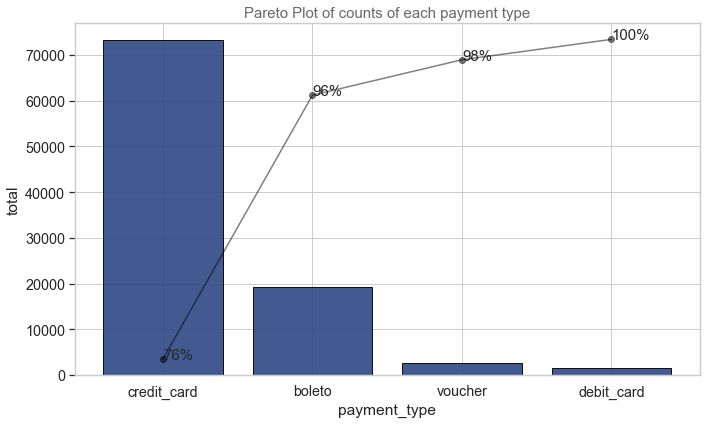

In [37]:
pareto_plot(temp,x='payment_type',y='total',title="Pareto Plot of counts of each payment type")

- 위의 플롯에서 사용자의 96%가 신용 카드와 boleto를 사용했음을 알 수 있음
- 사용자의 98%가 신용 카드, boleto 및 상품권을 사용
- 또는 고객이 credit_card 또는 boleto 또는 상품권을 사용할 확률이 98%
- 대상 변수(예: 리뷰 점수)와 관련이 있는지?

[Horizontal bar chart — Matplotlib 3.5.1 documentation](https://matplotlib.org/stable/gallery/lines_bars_and_markers/barh.html)

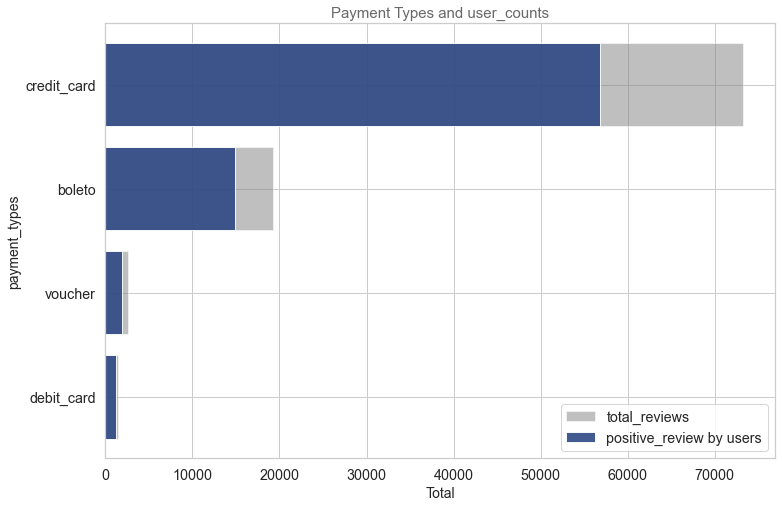

In [38]:
#Let us see how this categorical feature related with our target variable
plt.figure(figsize=(12,8))
p1=plt.barh(temp.payment_type,temp.total,color='grey',alpha=0.5)
p2=plt.barh(temp.payment_type,temp.review_score,color='#2e4884',alpha=0.9)
plt.title('Payment Types and user_counts',fontsize=15,color='dimgrey')
plt.ylabel('payment_types',fontsize=14)
plt.xlabel('Total',fontsize=14)
plt.legend((p1[0], p2[0]), ('total_reviews', 'positive_review by users'))

plt.show()

- 신용 카드를 사용한 대부분의 고객이 긍정적인 리뷰를 제공
- 또한 boleto, 상품권 및 직불 카드 사용자의 경우에도 동일.
- 이것으로부터 우리는 이것이 문제에 대한 우리의 중요한 범주적 특징이 될 수 있다는 결론을 내릴 수 있음

### 일변량 분석: State wise 기반 고객 수

![alt text](https://st4.depositphotos.com/1374738/23094/v/950/depositphotos_230940566-stock-illustration-map-brazil-divisions-states.jpg)

[link text](https://)
- Image Source : https://st4.depositphotos.com/1374738/23094/v/950/depositphotos_230940566-stock-illustration-map-brazil-divisions-states.jpg

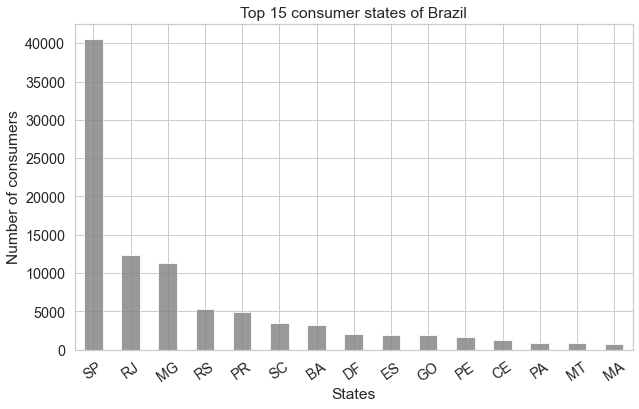

In [39]:
# State with the consumers count
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
ax = df.customer_state.value_counts().sort_values(ascending=False)[0:15].plot(kind='bar', color = 'grey', alpha=0.8)
ax.set_title("Top 15 consumer states of Brazil")
ax.set_xlabel("States")
plt.xticks(rotation=35)
ax.set_ylabel("Number of consumers")
plt.show()

- 총 소비자의 42%는 SP(상파울루), 12.9%는 RJ(리우데자네이루), 11.7%는 MG(Minas Gerais) 출신으로 대부분의 소비자가 이 주 출신
- 가장 활성화된 인접 지역
- 이제 이러한 상태의 소비자로부터 어떤 유형의 리뷰가 제공되는지?

In [40]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2, col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values,color = 'grey',alpha=0.5)
    p2 = plt.bar(ind, data[col2].values,color= '#2e4884',alpha=0.8)

    plt.ylabel('Reviews')
    plt.title('% of review_score  ')
    plt.xticks(ind-0.1, list(data[xtick].values), rotation=0)
    plt.legend((p1[0], p2[0]), ('total_reviews', 'positive_review'))
    plt.show()

In [41]:
# Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
temp_1 = pd.DataFrame(df.groupby('customer_state')['review_score'].agg(lambda x: x.eq(2).sum())).reset_index()

# Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039


temp_1['total'] = list(pd.DataFrame(df.groupby('customer_state')['review_score'].agg([('total','count'),('Avg','mean')]))['total'])
temp_1['Avg']   = list(pd.DataFrame(df.groupby('customer_state')['review_score'].agg([('total','count'),('Avg','mean')]))['Avg'])
temp_1= temp_1.rename(columns={'review_score':'positive_review'})
temp_1= temp_1.sort_values(by=['total'], ascending=False)

In [42]:
temp_1

,customer_state,positive_review,total,Avg
25,SP,32484,40536,1.681986
18,RJ,8883,12410,1.514102
10,MG,8903,11297,1.660087
22,RS,4200,5331,1.658413
17,PR,3949,4902,1.686659
23,SC,2721,3526,1.631310
4,BA,2347,3277,1.531279
6,DF,1613,2084,1.627639
7,ES,1514,1981,1.619384
8,GO,1480,1946,1.617677


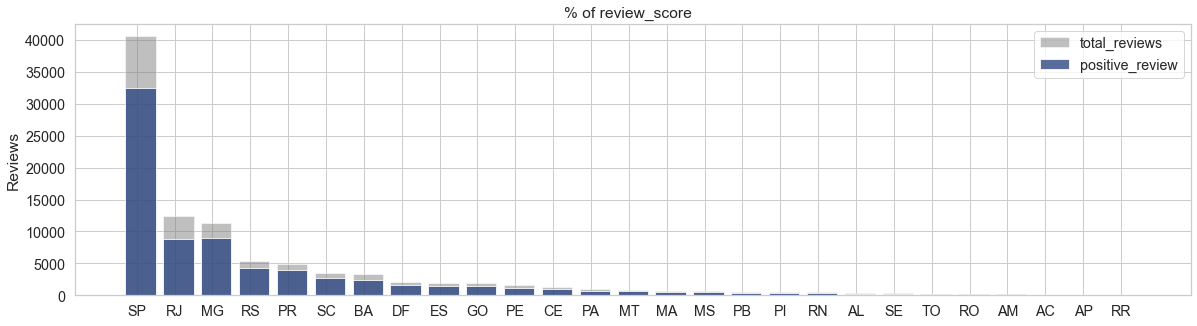

In [43]:
stack_plot(temp_1,'customer_state',col2='positive_review', col3='total')

- 주별 리뷰의 위 스택 플롯에서 각 주의 소비자 대부분이 긍정적인 리뷰 를 제공했다는 결론
- SP 주 에서는 총 40800개의 리뷰에서 35791개의 리뷰가 긍정적인 리뷰이고 RJ 주의 경우 총 12569리뷰에서 9968개의 리뷰가 긍정적
- consumer_state가 문제에 대한 중요한 기능이 될 수 있음

### 일변량 분석: product_category_name_english

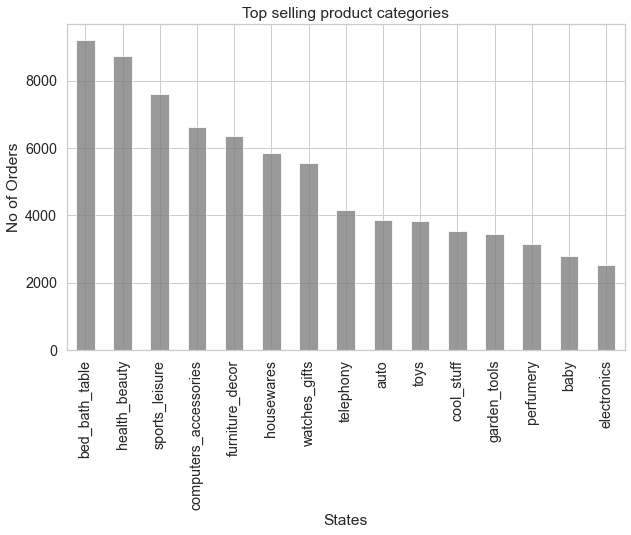

In [44]:
# State with the product_category count
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
ax = df.product_category_name_english.value_counts().sort_values(ascending=False)[0:15].plot(kind='bar', color = 'grey', alpha=0.8)
ax.set_title("Top selling product categories")
ax.set_xlabel("States")
plt.xticks(rotation=90)
ax.set_ylabel("No of Orders")
plt.show()

- 2016년과 2018년 사이에 가장 많이 주문된 카테고리는 bed_bath_table, health beauty, sports_leisure
- 가장 적게 주문된 카테고리는 security_and_services

In [45]:
temp_2 = pd.DataFrame(df.groupby('product_category_name_english')['review_score'].agg(lambda x: x.eq(2).sum())).reset_index()

# Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039


temp_2['total'] = list(pd.DataFrame(df.groupby('product_category_name_english')['review_score'].agg([('total','count'),('Avg','mean')]))['total'])
temp_2['Avg']   = list(pd.DataFrame(df.groupby('product_category_name_english')['review_score'].agg([('total','count'),('Avg','mean')]))['Avg'])
temp_2 = temp_2.sort_values(by=['total'], ascending=True)
temp_2

,product_category_name_english,review_score,total,Avg
61,security_and_services,1,2,1.000000
29,fashion_childrens_clothes,5,6,1.666667
52,la_cuisine,10,11,1.818182
11,cds_dvds_musicals,11,12,1.916667
3,arts_and_craftmanship,17,21,1.714286
...,...,...,...,...
39,furniture_decor,4754,6366,1.580899
15,computers_accessories,5027,6627,1.598914
65,sports_leisure,6093,7613,1.672402
43,health_beauty,6954,8732,1.670293


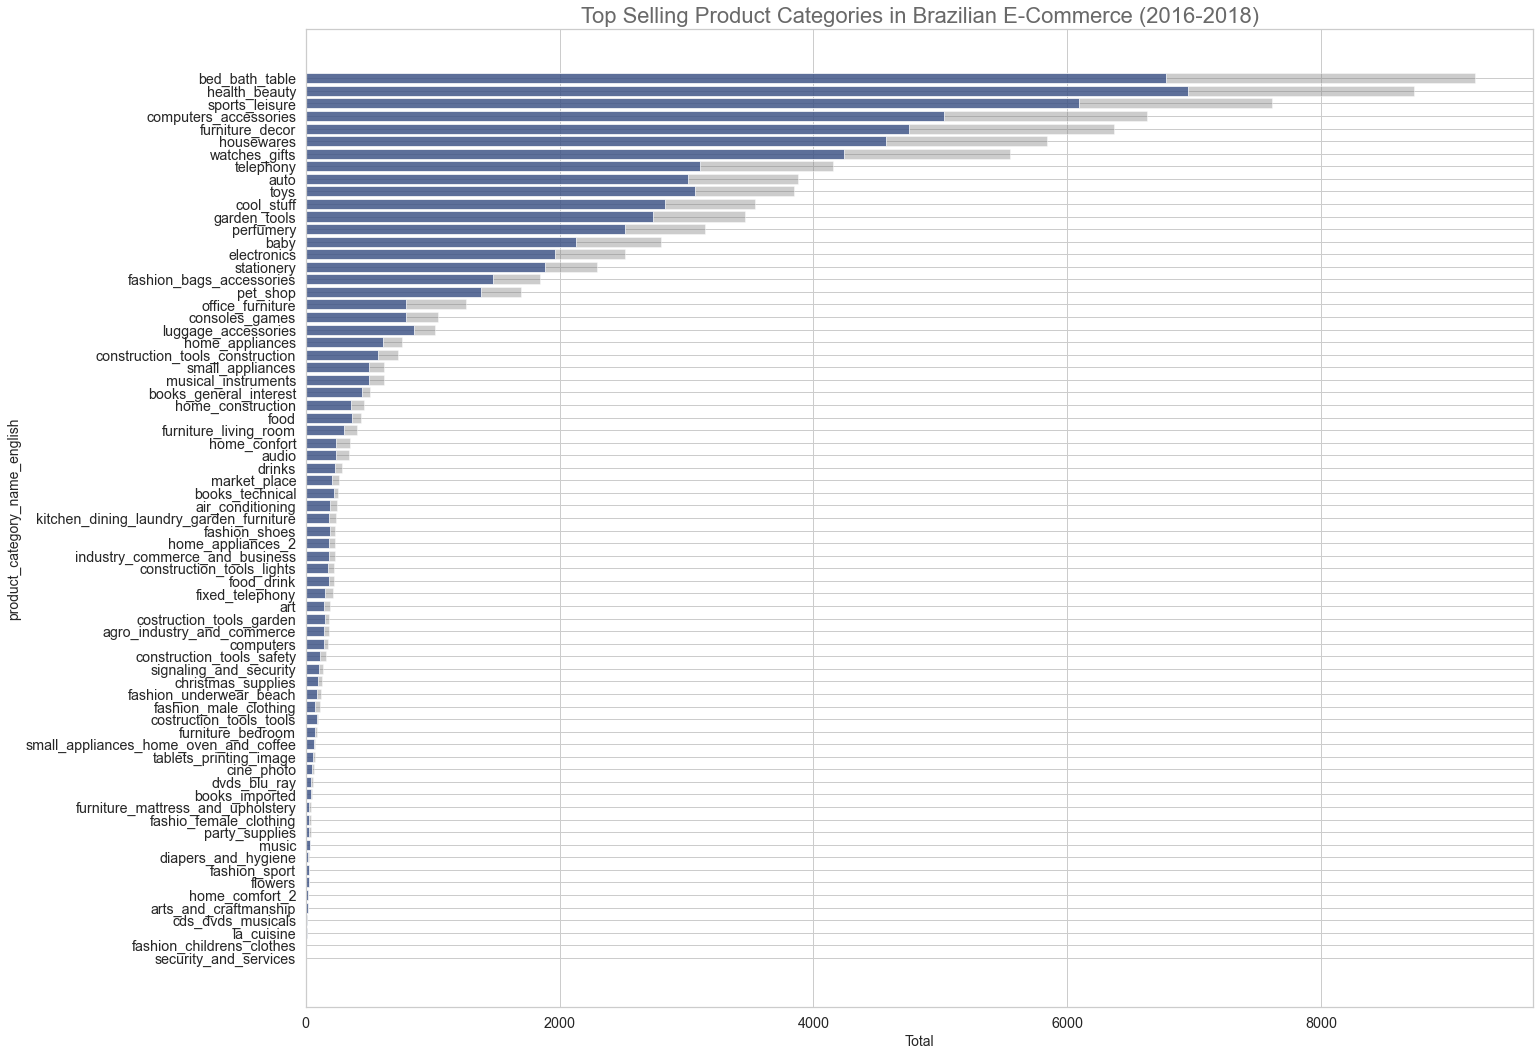

In [46]:
#code source-https://matplotlib.org/stable/gallery/lines_bars_and_markers/barh.html
plt.figure(figsize=(22,18))
plt.barh(temp_2.product_category_name_english,temp_2.total,color='grey',alpha=0.4)
plt.barh(temp_2.product_category_name_english,temp_2.review_score,color='#2e4884',alpha=0.7)
plt.title('Top Selling Product Categories in Brazilian E-Commerce (2016-2018)',fontsize=22,color='dimgrey')
plt.ylabel('product_category_name_english',fontsize=14)
plt.xlabel('Total',fontsize=14)
plt.savefig('plot14.png', dpi=480, bbox_inches='tight')
plt.show()

- 총 리뷰와 긍정적인 의미의 리뷰를 보여주는 스택 플롯
- bed_bath_table 카테고리에 대한 대부분의 리뷰가 긍정적이고 다른 제품 범주에 대해서도 동일하다는 결론

### 일변량 분석: frequency of orders Vs Number of Consumers

Text(0.5, 1.0, 'Number of orders per customer')

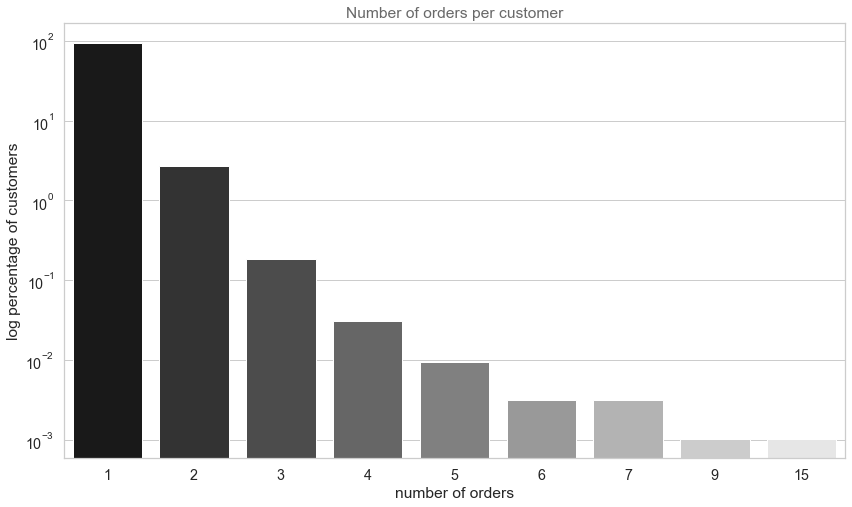

In [47]:
# plotting frequency orders vs  the number of consumers 
plt.figure(figsize=(14,8))

#counting the consumers and converting it into percentage to visualize the distribution properly
#소비자를 세어 백분율로 환산하여 분포를 제대로 시각화
num_orders=df['customer_unique_id'].value_counts().value_counts()/df.shape[0]*100
num_orders=num_orders.reset_index()
#renaming the columns
num_orders.rename(columns={'index':'number of orders', 'customer_unique_id':'log percentage of customers'},inplace=True)

#plotting bar plot
sns.barplot(data=num_orders,x='number of orders',y='log percentage of customers',palette='gray')
plt.yscale('log') #log scale
plt.title('Number of orders per customer',color='dimgrey')

- 대부분의 소비자는 제품을 한 번만 주문하고 35번 이상 주문한 소비자는 거의 없음

###  일변량 분석: Order_status

[viz_utils | Kaggle](https://www.kaggle.com/thiagopanini/viz-utils/data)

In [48]:
# Formatando eixos do matplotlib
def format_spines(ax, right_border=True):
    """
    This function sets up borders from an axis and personalize colors

    Input:
        Axis and a flag for deciding or not to plot the right border
    Returns:
        Plot configuration
    """
    # Setting up colors
    ax.spines['bottom'].set_color('#CCCCCC')
    ax.spines['left'].set_color('#CCCCCC')
    ax.spines['top'].set_visible(False)
    if right_border:
        ax.spines['right'].set_color('#CCCCCC')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')

In [49]:
def single_countplot(df, ax, x=None, y=None, top=None, order=True, hue=False, palette='plasma',
                     width=0.75, sub_width=0.3, sub_size=12):
    """
    Parâmetros
    ----------
    classifiers: conjunto de classificadores em forma de dicionário [dict]
    X: array com os dados a serem utilizados no treinamento [np.array]
    y: array com o vetor target do modelo [np.array]

    Retorno
    -------
    None
    """

    # Verificando plotagem por quebra de alguma variável categórica
    ncount = len(df)
    if x:
        col = x
    else:
        col = y

    # Verificando a plotagem de top categorias
    if top is not None:
        cat_count = df[col].value_counts()
        top_categories = cat_count[:top].index
        df = df[df[col].isin(top_categories)]

    # Validando demais argumentos e plotando gráfico
    if hue != False:
        if order:
            sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax, order=df[col].value_counts().index, hue=hue)
        else:
            sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax, hue=hue)
    else:
        if order:
            sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax, order=df[col].value_counts().index)
        else:
            sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax)

    # Formatando eixos
    format_spines(ax, right_border=False)

    # Inserindo rótulo de percentual
    if x:
        for p in ax.patches:
            x = p.get_bbox().get_points()[:, 0]
            y = p.get_bbox().get_points()[1, 1]
            ax.annotate('{}\n{:.1f}%'.format(int(y), 100. * y / ncount), (x.mean(), y), ha='center', va='bottom')
    else:
        for p in ax.patches:
            x = p.get_bbox().get_points()[1, 0]
            y = p.get_bbox().get_points()[:, 1]
            ax.annotate('{} ({:.1f}%)'.format(int(x), 100. * x / ncount), (x, y.mean()), va='center')


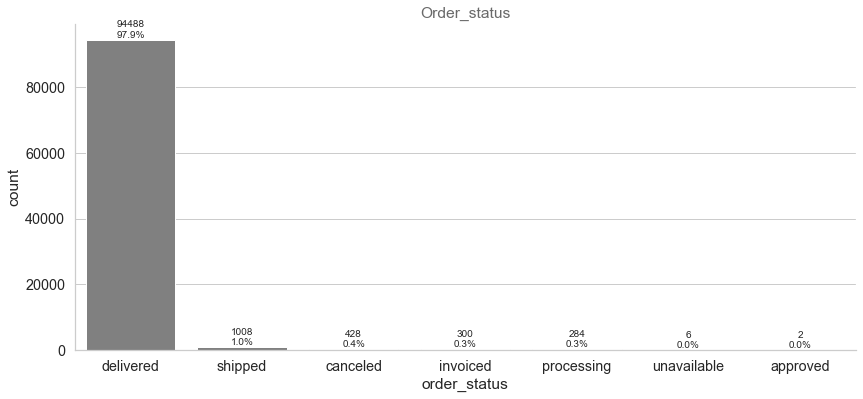

In [50]:
#by using custom countplots in (viz_utils)

fig, ax = plt.subplots(figsize=(14, 6))
single_countplot(df, x='order_status', ax=ax,palette=['grey'])
# sns.barplot(data=df, x='order_status', ax=ax,palette='grey')
plt.title('Order_status',color='dimgrey')
plt.show()

ValueError: cannot convert float NaN to integer

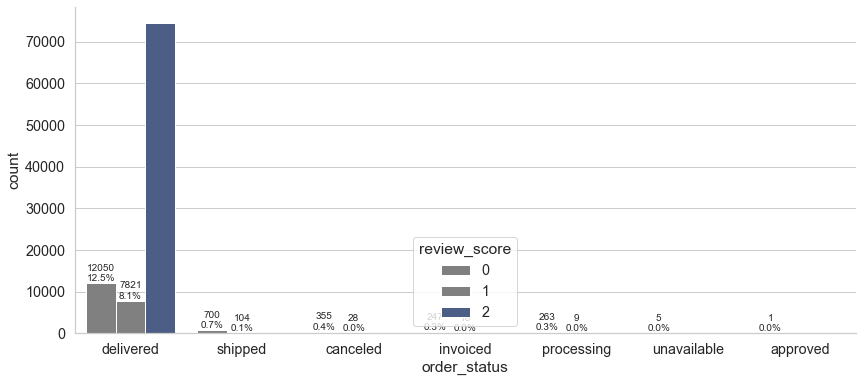

In [51]:
#by using custom countplots in (viz_utils)
fig, ax = plt.subplots(figsize=(14, 6))
single_countplot(df, x='order_status', ax=ax,palette=['grey','grey','#425a90'],hue='review_score')
plt.title('Order_status with % of Reviews',color='dimgrey')
plt.show()

### 다른 타임스탬프에 대한 일변량 분석

In [52]:
#calulating number of days for the data is taken
print(df.order_approved_at.max() - df.order_approved_at.min(), ' from ', 
      df.order_approved_at.min(), ' to ', df.order_approved_at.max())

699 days 07:56:34  from  2016-10-04 09:43:32  to  2018-09-03 17:40:06


In [53]:
#code source-https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column
df_1=df
# Extracting attributes for purchase date - Year and Month
df_1['order_purchase_year'] = df['order_purchase_timestamp'].apply(lambda x: x.year) #gives year Example :2016-10-04 09:43:32 ---->2016
df_1['order_purchase_month'] = df['order_purchase_timestamp'].apply(lambda x: x.month) #gives month Example :2016-10-04 09:43:32 ---->10
df_1['order_purchase_month_name'] = df['order_purchase_timestamp'].apply(lambda x: x.strftime('%b'))#gives month in short form Example :2016-10-04 09:43:32 ---->10--> Oct
df_1['order_purchase_year_month'] = df['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m'))#gives month&year Example :2016-10-04 09:43:32 ---->201610
df_1['order_purchase_date'] = df['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m%d'))#gives month,yr and date  Example :2016-10-04 09:43:32 ---->20161004
df_1['order_purchase_month_yr'] = df['order_purchase_timestamp'].apply(lambda x: x.strftime("%b-%y"))

# Extracting attributes for purchase date - Day and Day of Week
df_1['order_purchase_day'] = df['order_purchase_timestamp'].apply(lambda x: x.day)
df_1['order_purchase_dayofweek'] = df['order_purchase_timestamp'].apply(lambda x: x.dayofweek)
df_1['order_purchase_dayofweek_name'] = df['order_purchase_timestamp'].apply(lambda x: x.strftime('%a'))

# Extracting attributes for purchase date - Hour and Time of the Day
df_1['order_purchase_hour'] = df['order_purchase_timestamp'].apply(lambda x: x.hour)
hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Dawn', 'Morning', 'Afternoon', 'Night']
df_1['order_purchase_time_day'] = pd.cut(df_1['order_purchase_hour'], hours_bins, labels=hours_labels)

# New DataFrame after transformations
df_1.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_score,review_comment_message,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_month_yr,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,2,"Não testei o produto ainda, mas ele veio corre...",2017,10,Oct,201710,20171002,Oct-17,2,0,Mon,10,Morning
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-18 14:44:43,2017-08-28,1,credit_card,3,37.77,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,2,Deveriam embalar melhor o produto. A caixa vei...,2017,8,Aug,201708,20170815,Aug-17,15,1,Tue,18,Afternoon
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-07 18:30:01,2017-08-15,1,credit_card,1,37.77,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,2,"Só achei ela pequena pra seis xícaras ,mais é ...",2017,8,Aug,201708,20170802,Aug-17,2,2,Wed,18,Afternoon
5,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-11-07 18:04:59,2017-11-13,1,boleto,1,44.09,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,nao_reveja,2017,10,Oct,201710,20171023,Oct-17,23,0,Mon,23,Night
6,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-28 18:59:23,2017-12-21,1,credit_card,10,356.12,3e4fd73f1e86b135b9b121d6abbe9597,19400,presidente venceslau,SP,1,be021417a6acb56b9b50d3fd2714baa8,f5f46307a4d15880ca14fab4ad9dfc9b,2017-11-30 00:21:09,339.00,17.12,utilidades_domesticas,48.0,664.0,6.0,14300.0,38.0,34.0,34.0,housewares,0,"Inicialmente, na data da compra o produto era ...",2017,11,Nov,201711,20171124,Nov-17,24,4,Fri,21,Night


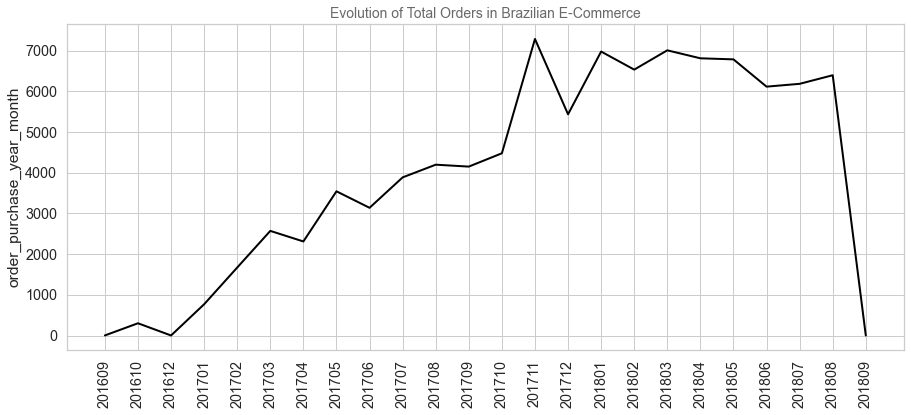

In [54]:
plt.figure(figsize=(15,6))
sns.lineplot(data=df_1['order_purchase_year_month'].value_counts().sort_index(), 
             color='black', linewidth=2)
plt.title('Evolution of Total Orders in Brazilian E-Commerce', size=14, color='dimgrey')
plt.xticks(rotation=90)
plt.show()

- 구매 수가 201609에서 201711(최고)로 증가하고 있다가 짧은 기간 동안 감소
- 이는 더 오래된 고객의 주문이 증가하거나 소비자 수가 증가하고 있음을 의미

In [55]:
df_month = pd.DataFrame()
df_month['date'],df_month['review_score']= list(df.order_approved_at),list(df.review_score)
df_month=df_month.dropna()
df_month = df_month.sort_values(by=['date'])

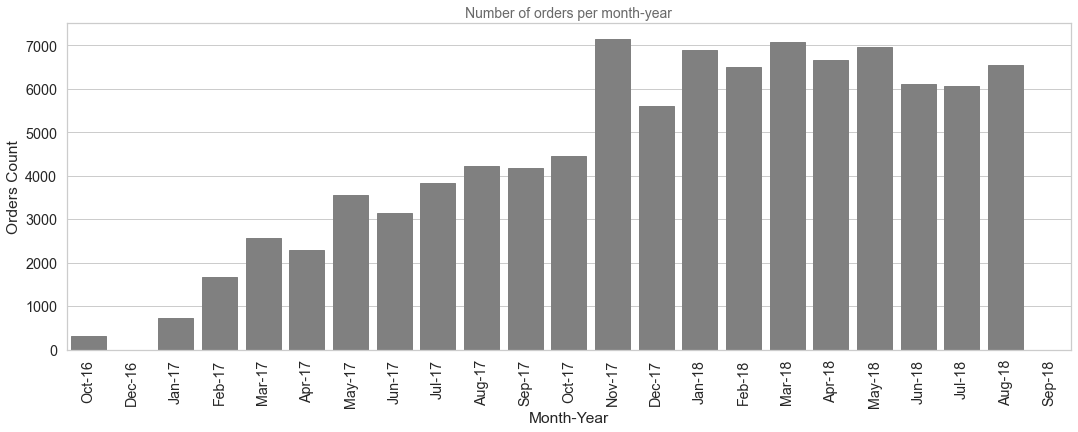

In [56]:
df_month['monthcount'] = list(df_month.date.apply(lambda x: x.strftime("%b-%y")))
#plotting number of orders per month-year
plt.figure(figsize=(18,6))
g = sns.countplot(x=df_month.monthcount,data=df_month,color='grey',edgecolor='grey')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_xlabel('Month-Year')
g.set_ylabel('Orders Count')
plt.title('Number of orders per month-year', size=14, color='dimgrey');

- 2016년과 2018 년 사이에 각각에 대해 월간 총 주문 수를 표시
- 2017년 11월에 가장 많은 주문이 접수되었음. 약 7000 이상
- 최소 주문 건수는 2016년 12월에 접수

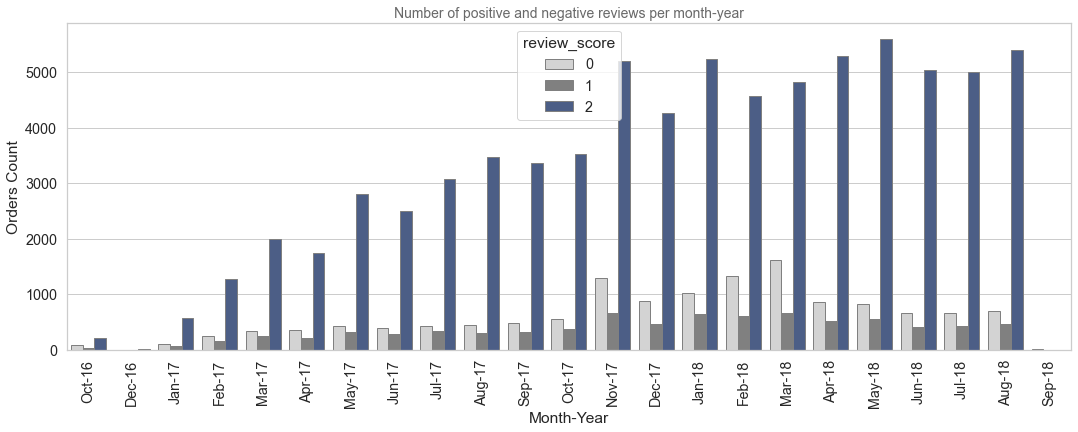

In [57]:
#plotting number of positive and negative reviews per month-year
plt.figure(figsize=(18,6))
g = sns.countplot(x=df_month.monthcount,hue='review_score',data=df_month,palette=['lightgray','gray','#425a90'],edgecolor='grey')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_xlabel('Month-Year')
g.set_ylabel('Orders Count')
plt.title('Number of positive and negative reviews per month-year', size=14, color='dimgrey');

- 월별 각 주문에 대해 제공된 긍정적 및 부정적 리뷰의 총 수
- 대부분의 주문이 긍정적인 리뷰를 제공
- NOV-17에 가장 높은 주문이 접수되었지만 5월-18일에 가장 높은 긍정적인 리뷰가 제공

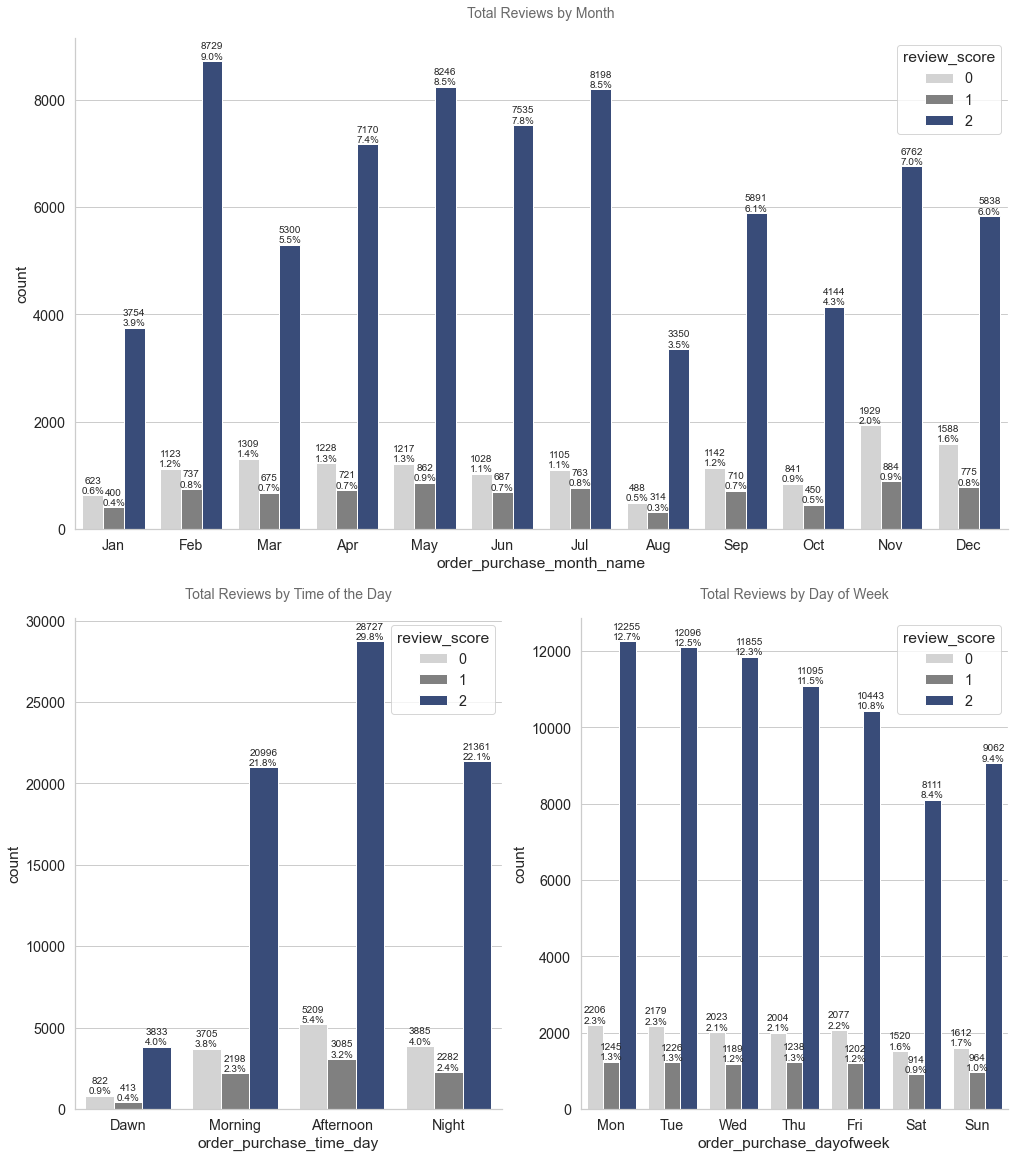

In [58]:
#code source: https://www.kaggle.com/thiagopanini/e-commerce-sentiment-analysis-eda-viz-nlp
fig = plt.figure(constrained_layout=True, figsize=(17, 20))

# Axis definition
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[0, :])
ax3 = fig.add_subplot(gs[1, 1])

# Barchart - Total Reviews by time of the day
single_countplot(df, x='order_purchase_time_day', ax=ax1, order=False, palette=['lightgray','gray','#2e4884'],hue='review_score')
ax1.set_title('Total Reviews by Time of the Day', size=14, color='dimgrey', pad=20)

# Barchart - Total Reviews by month
single_countplot(df, x='order_purchase_month_name', ax=ax2, order=False, palette=['lightgray','gray','#2e4884'],hue='review_score')

ax2.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep','Oct','Nov','Dec'])
ax2.set_title('Total Reviews by Month', size=14, color='dimgrey', pad=20)

single_countplot(df, x='order_purchase_dayofweek', ax=ax3, order=False, palette=['lightgray','gray','#2e4884'],hue='review_score')
weekday_label = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax3.set_xticklabels(weekday_label)
ax3.set_title('Total Reviews by Day of Week', size=14, color='dimgrey', pad=20)

plt.savefig('plot14.png', dpi=300, bbox_inches='tight')
plt.tight_layout()

plt.show()

- 월별 총 리뷰 서브플롯 : 2016년에서 2018년 사이의 총 리뷰 중 긍정적인 리뷰의 가장 높은 9.0%가 2월에 제공.
                     5월과 7월에는 총 리뷰 중 8.5% 이상의 리뷰가 긍정적

- 시간별 총 리뷰 서브플롯 : 오후에 최대 주문 수를 받고 긍정적인 리뷰의 가장 높은 비율(29.8%)도 해당 시간에 제공

- 요일별 총 리뷰 서브플롯 : 월요일에 최대 주문 수를 받고, 긍정적인 리뷰의 가장 높은 %가 월요일과 화요일

In [59]:
#ploting plot for the Total Number orders based on the Total delivery Time(Days)
#https://stackoverflow.com/questions/60229375/solution-for-specificationerror-nested-renamer-is-not-supported-while-agg-alo
df['day_to_delivery']=((df['order_delivered_customer_date']-df['order_purchase_timestamp']).dt.days)

In [60]:
df_dev = pd.DataFrame()
df_dev['day_to_delivery'],df_dev['review_score']= list(df.day_to_delivery),list(df.review_score)
df_dev=df_dev.dropna()

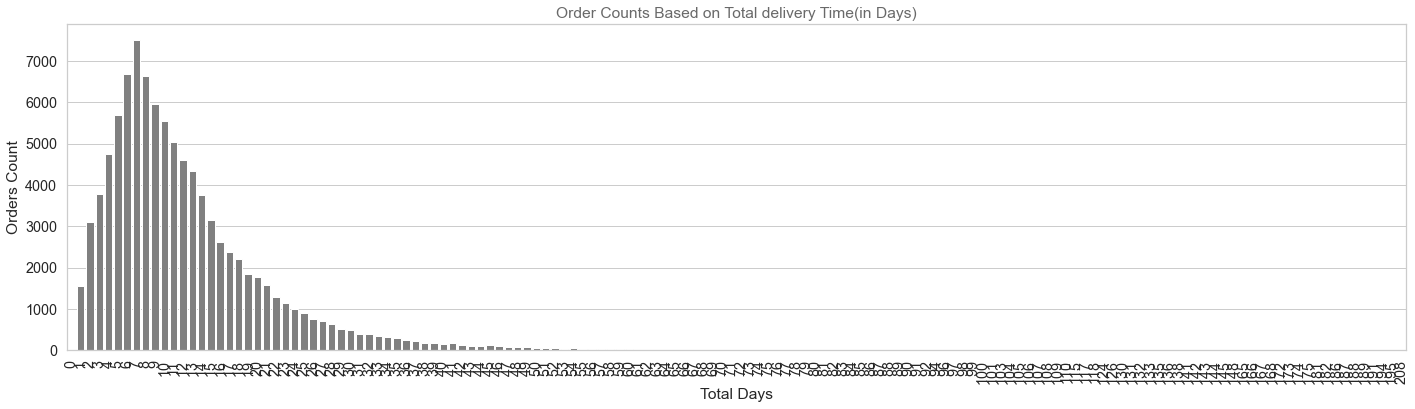

In [61]:
plt.figure(figsize=(24,6))
plt.title('Order Counts Based on Total delivery Time(in Days)', color='dimgrey')
g = sns.countplot(x=df_dev.day_to_delivery,data=df_dev,color='gray')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_xlabel('Total Days')
g.set_ylabel('Orders Count');

- 최대 주문수량은 7일 만에 배송되는 경우가 적고, 30일 이상 배송되는 경우도 적음

### 수치적 특징에 대한 일변량 분석

#### 가격

<Figure size 1872x576 with 0 Axes>

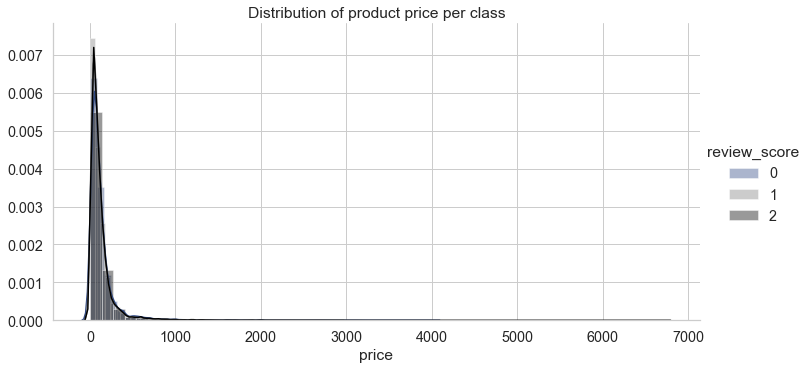

In [62]:
import seaborn as sns

plt.figure(figsize=(26,8))
sns.set_style("whitegrid")
ax = sns.FacetGrid(df, hue="review_score", height=5,aspect=2.0,palette=['#2e4884','gray','black'])
ax = ax.map(sns.distplot, "price").add_legend();
plt.title('Distribution of product price per class')
plt.show()

- 포지티브 클래스와 네거티브 클래스 모두에 대한 가격 분포
- 포지티브 클래스와 네거티브 클래스의 분포가 거의 완전히 겹치는 것을 관찰할 수 있으며, 이는 가격 특성만으로는 분류할 수 없음을 나타냄

<Figure size 432x288 with 0 Axes>

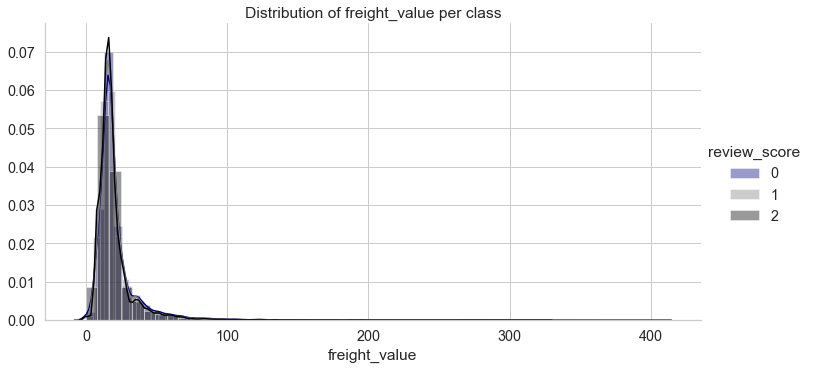

In [63]:
# plotting distributions of freight_value per class
plt.figure()
#sns.set_style("whitegrid")
ax = sns.FacetGrid(df, hue="review_score", height=5,aspect=2.0,palette=['#000080','gray','black'])
ax = ax.map(sns.distplot, "freight_value").add_legend();
plt.title('Distribution of freight_value per class')
plt.show()

- 양수 클래스와 음수 클래스 모두에 대한 화물 값의 분포
- positive class와 negative class의 분포가 거의 완전히 겹치는 것을 볼 수 있는데, 이는 화물 값 특성만으로는 분류할 수 없음을 나타냄

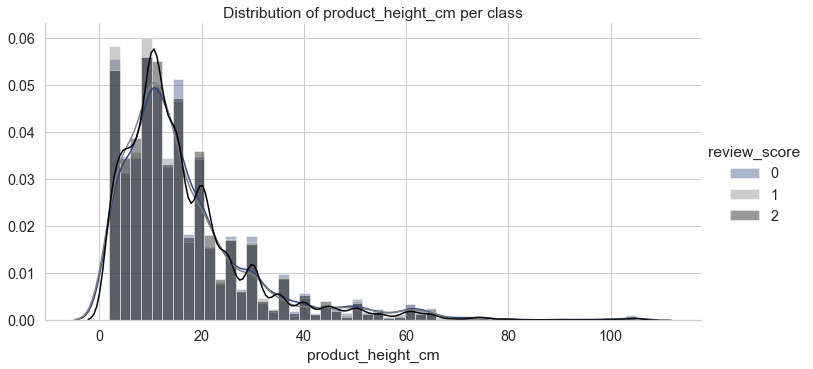

In [64]:
# plotting distributions of product_height_cm per class
sns.set_style("whitegrid")
ax = sns.FacetGrid(df, hue="review_score", height=5,aspect=2.0,palette=['#2e4884','gray','black'])
ax = ax.map(sns.distplot, "product_height_cm").add_legend();
plt.title('Distribution of product_height_cm per class')
plt.show()

- 포지티브 및 네거티브 클래스 모두에 대한 product_height_cm 분포
- 대부분의 제품의 높이가 20 미만
- positive 및 negative 클래스의 분포가 거의 완전히 중복되어 product_height_cm 특성만으로는 분류할 수 없음을 나타냄

<Figure size 432x288 with 0 Axes>

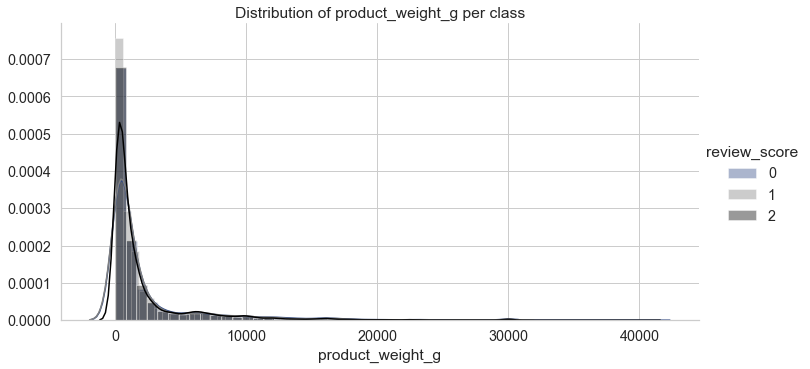

In [65]:
# distriution plot of product_weight_g
plt.figure()
sns.set_style("whitegrid")
ax = sns.FacetGrid(df, hue="review_score", height=5,aspect=2.0,palette=['#2e4884','gray','black'])
ax = ax.map(sns.distplot, "product_weight_g").add_legend();
plt.title('Distribution of product_weight_g per class')
plt.show()

- 포지티브 클래스와 네거티브 클래스 모두에 대한 product_weight_g의 분포
- 대부분의 제품이 5000gm 미만의 무게를 가지고 있음
- 긍정적인 클래스와 부정적인 클래스의 분포가 거의 완전히 중복되어 product_weight_g 특성만으로는 분류할 수 없음을 나타냄

<Figure size 432x288 with 0 Axes>

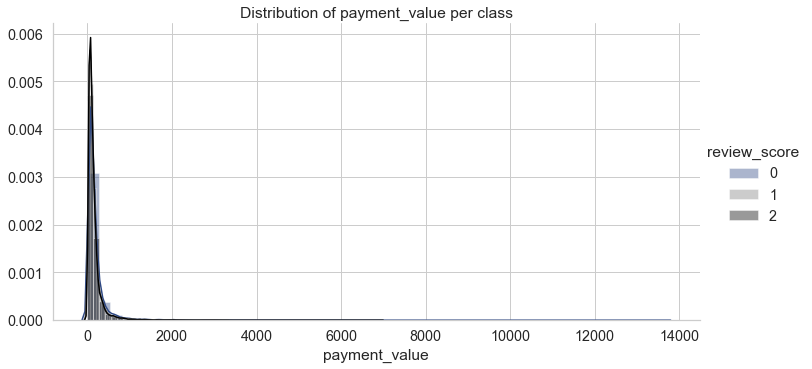

In [66]:
# distriution plot of payment_value
plt.figure()
sns.set_style("whitegrid")
ax = sns.FacetGrid(df, hue="review_score", height=5,aspect=2.0,palette=['#2e4884','gray','black'])
ax = ax.map(sns.distplot, "payment_value").add_legend();
plt.title('Distribution of payment_value per class')
plt.show()

- 양수 클래스와 음수 클래스 모두에 대한 payment_value의 분포
- 포지티브 및 네거티브 클래스의 분포가 거의 완전히 겹치는 것을 관찰할 수 있으며 이는 payment_value 특성만으로는 분류할 수 없음을 나타냄

* Box Plot

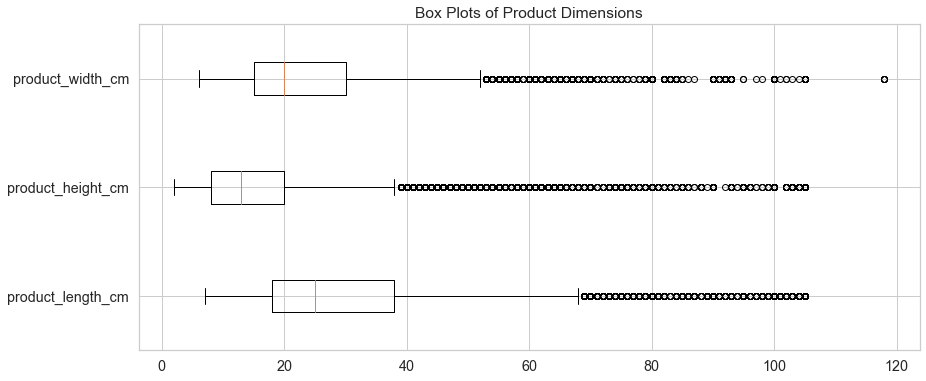

In [67]:
import matplotlib.pyplot as plt
 
plt.figure(figsize=(14,6))
 
box_plot_data=[df.product_length_cm,df.product_height_cm,df.product_width_cm]
plt.boxplot(box_plot_data,labels=['product_length_cm','product_height_cm','product_width_cm'],vert=False)
plt.title("Box Plots of Product Dimensions")
plt.savefig('plot24.png', dpi=400, bbox_inches='tight')
plt.show()

- 수치적 특성 product_width_cm, product_height_cm 및 product_width_cm의 분포를 보여줌. 이러한 기능은 서로 겹침

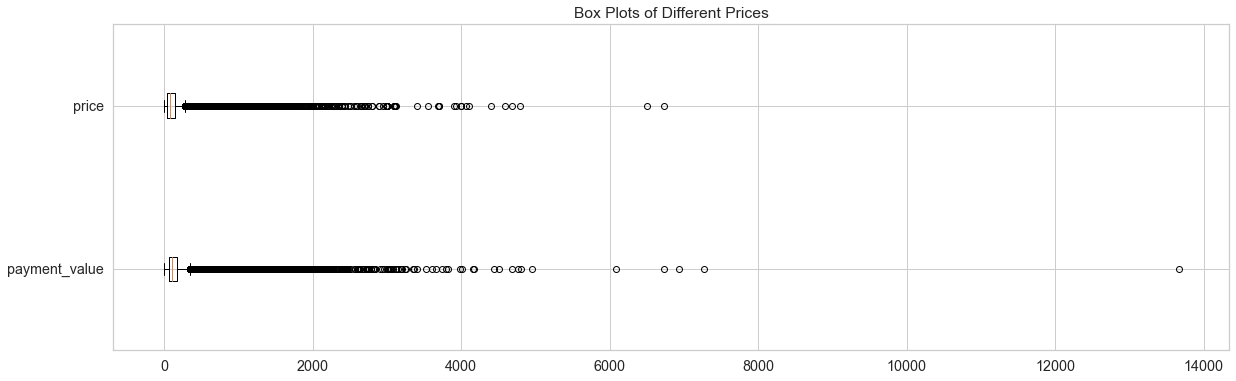

In [68]:
import matplotlib.pyplot as plt
 
plt.figure(figsize=(20,6))
 
box_plot_data=[df.payment_value,df.price]
plt.boxplot(box_plot_data,labels=['payment_value','price'],vert=False)
plt.title("Box Plots of Different Prices")
plt.savefig('plot25.png', dpi=400, bbox_inches='tight')
plt.show()

### 이변량 분석

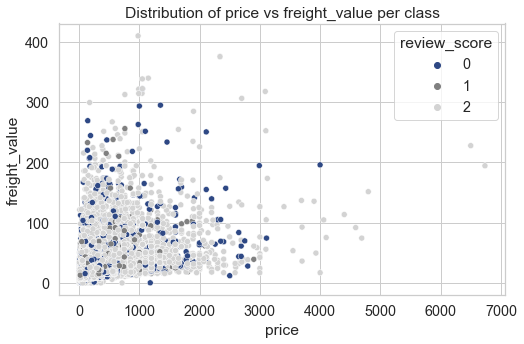

In [70]:
# Distribution of price vs freight_value per class
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
ax = sns.scatterplot(x='price',y='freight_value', data = df, hue="review_score",palette=['#2e4884','gray','lightgray'])
plt.title('Distribution of price vs freight_value per class')
plt.show()

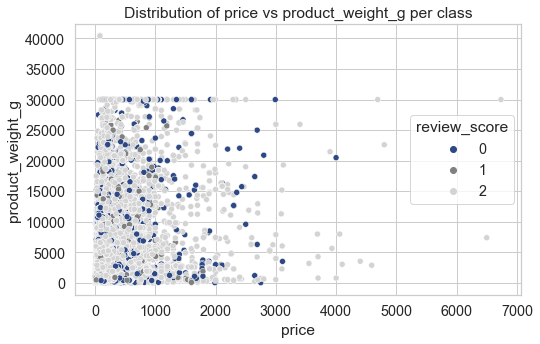

In [72]:
# Distribution of price vs freight_value per class
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
ax = sns.scatterplot(x='price',y='product_weight_g', data = df, hue="review_score",palette=['#2e4884','grey','lightgray'])
plt.title('Distribution of price vs product_weight_g per class')
plt.show()

- 위의 두 산점도에서 Distribution of price vs freight_value per class및 Distribution of price vs product_weight_g per class각각,데이터 포인트는 리뷰를 기반으로 분리할 수 없는 완전히 혼합된 데이터이므로 이러한 플롯을 기반으로 리뷰에 대해 아무 말도 하기가 매우 어려움

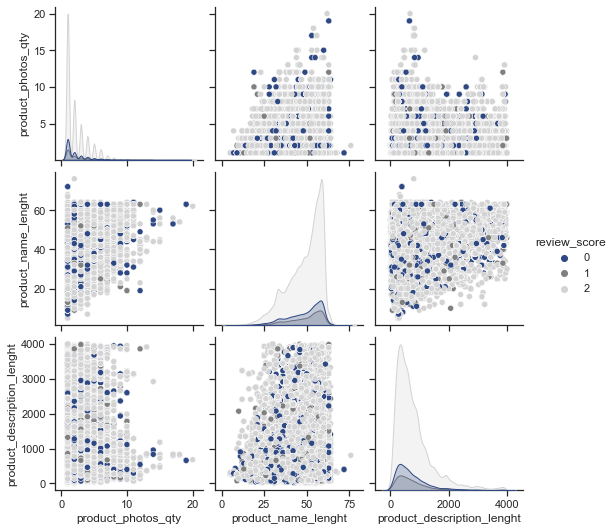

In [73]:
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
# pair plot
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df[['product_photos_qty','product_name_lenght','product_description_lenght','review_score']],hue='review_score',palette=['#2e4884','gray','lightgray'])
g.savefig("pairplot1.png")

- product_photos_qty, product_name_length, product_description_length 기능에 대해 위에 표시된 쌍 플롯은 review_score 열과 음의 상관 관계 값
- 기능 사이의 모든 산점도는 리뷰를 기반으로 분리할 수 없는 완전히 혼합되어 있음

### 다변수 분석

- 가격 및 월별 총 주문의 변화

In [74]:
df_mm=df[['order_purchase_month_name','price']].groupby('order_purchase_month_name').sum()

In [75]:
pi = list(df_mm['price'])
li = list(df_mm.index)
#dict of months and price value
res = {li[i]: pi[i] for i in range(len(li))}

In [76]:
from collections import OrderedDict
mnths = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep','Oct','Nov','Dec']
weeks=['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
res = dict(OrderedDict(sorted(res.items(),key =lambda x:mnths.index(x[0]))))#sorting by month
print(res)

{'Jan': 944793.1800000303, 'Feb': 973912.5200000321, 'Mar': 1211684.9699999955, 'Apr': 1220808.3200000054, 'May': 1335529.2199999604, 'Jun': 1183381.570000002, 'Jul': 1248562.2399999802, 'Aug': 1295710.3799999715, 'Sep': 550710.1300000068, 'Oct': 621872.3200000086, 'Nov': 885910.4200000276, 'Dec': 666699.8200000111}


In [79]:
temp_3= pd.DataFrame(df.groupby('order_purchase_month_name')['review_score'].agg(lambda x: x.eq(2).sum())).reset_index()

# Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039


temp_3['total'] = list(pd.DataFrame(df.groupby('order_purchase_month_name')['review_score'].agg([('total','count'),('Avg','mean')]))['total'])
temp_3['Avg']   = list(pd.DataFrame(df.groupby('order_purchase_month_name')['review_score'].agg([('total','count'),('Avg','mean')]))['Avg'])
temp_3= temp_3.sort_values(by=['total'], ascending=True)

In [80]:
rem = {list(temp_3.order_purchase_month_name)[i]: list(temp_3.total)[i] for i in range(len(temp_3))}
rem = dict(OrderedDict(sorted(rem.items(),key =lambda x:mnths.index(x[0]))))
print(rem)

{'Jan': 7743, 'Feb': 8201, 'Mar': 9575, 'Apr': 9119, 'May': 10325, 'Jun': 9250, 'Jul': 10066, 'Aug': 10589, 'Sep': 4152, 'Oct': 4777, 'Nov': 7284, 'Dec': 5435}


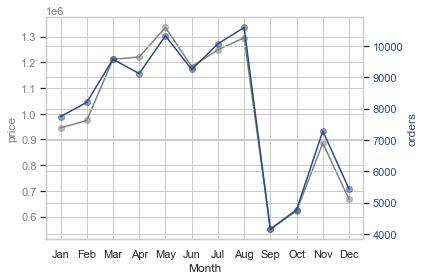

In [81]:
#https://matplotlib.org/2.2.5/gallery/api/two_scales.html
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("whitegrid")


fig, ax1 = plt.subplots()

color = 'grey'
ax1.set_xlabel('Month')
ax1.set_ylabel('price', color=color)
ax1.plot(list(res.keys()),list(res.values()), color=color)
ax1.plot(list(res.keys()),list(res.values()),'C0o', alpha=0.5,color='grey')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = '#2e4884'
ax2.set_ylabel('orders', color=color)  # we already handled the x-label with ax1
ax2.plot(list(res.keys()),list(rem.values()), color=color)
ax2.plot(list(res.keys()),list(rem.values()),'C0o', alpha=0.5,color='#2e4884')
ax2.tick_params(axis='y', labelcolor=color)
#creating  points 


fig.tight_layout( )  # otherwise the right y-label is slightly clipped
plt.show()

- 2016년과 2018년 사이에 동일한 패턴의 총 판매 및 월별 총 주문이 있음

### 텍스트 분석

In [83]:
# Reading in the reviews dataset
review_df = pd.read_csv('data/olist_order_reviews_dataset.csv')
review_df.head()
review_df.shape

(99224, 7)

In [84]:
review_data_title = review_df['review_comment_title']
review_data = review_df.drop(['review_comment_title'],axis=1)

# Dropping NaN values
review_data  = review_data.dropna()
review_data_title = review_data_title.dropna()

In [85]:
# Resetting the reviews index and visualizing the data
review_data = review_data.reset_index(drop=True)
review_data.head(3)
review_data.shape

(40977, 6)

In [86]:
# Resetting the reviews titles index and visualizing the data
review_data_title = review_data_title.reset_index(drop=True)
review_data_title.head(3)
review_data_title.shape

(11568,)

In [93]:
import nltk
# nltk.download()
# nltk.download('stopwords')
# nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/JungSunghyun/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [94]:
comments = []
stop_words = set(stopwords.words('portuguese'))


for words in review_data['review_comment_message']:
    only_letters = re.sub("[^a-zA-Z]", " ",words)
    tokens = nltk.word_tokenize(only_letters) #tokenize the sentences
    lower_case = [l.lower() for l in tokens] #convert all letters to lower case
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case)) #Remove stopwords from the comments
    comments.append(' '.join(filtered_result))

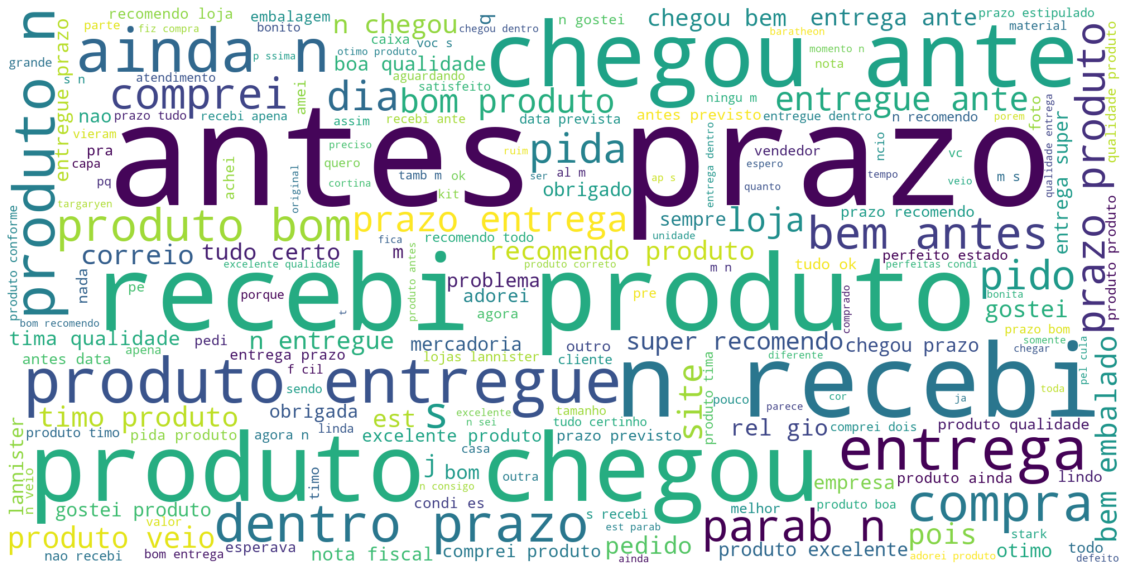

In [95]:
#Using wordcloud to visualize the comments
unique_string=(" ").join(comments)
wordcloud = WordCloud(width = 2000, height = 1000,background_color='white').generate(unique_string)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('plot23.png', dpi=400, bbox_inches='tight')
plt.show()

In [96]:
#further checking by Counting the words
from collections import Counter
words = (" ".join(review_data['review_comment_message'])).lower().split()
counts = Counter(words)

In [97]:
print("Most frequent words:")
sorted(counts.items(), key=lambda x: x[1], reverse=True)[:15]

Most frequent words:


[('o', 18676),
 ('e', 15582),
 ('produto', 15462),
 ('a', 12133),
 ('de', 11296),
 ('do', 11139),
 ('não', 10614),
 ('que', 8271),
 ('muito', 7568),
 ('com', 5574),
 ('antes', 5533),
 ('entrega', 5363),
 ('chegou', 5130),
 ('prazo', 5043),
 ('no', 5038)]

In [98]:
print("Least frequent words:")
sorted(counts.items(), key=lambda x: x[1], reverse=False)[:15]

Least frequent words:


[('3desinfector', 1),
 ('nome...atualizar', 1),
 (',travando...pelo', 1),
 ('decpcionou', 1),
 ('amim', 1),
 ('dispensada', 1),
 ('atrasaram,', 1),
 ('apaixonada,', 1),
 ('tomara', 1),
 ('pelinho.', 1),
 ('midea', 1),
 ('split', 1),
 ('estilo.', 1),
 ('parceria:', 1),
 ('rápidíssima,', 1)]

In [104]:
# #  google translate(from portuguese to english)
# from google_trans_new import google_translator
# translator = google_translator()
# translate_text = translator.translate('produto',lang_tgt='en',lang_src='pt' )
# print(translate_text)

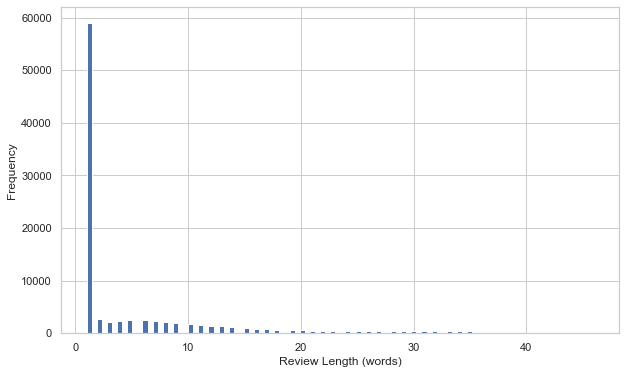

In [103]:
# Getting the number of words by splitting them by a space
words_per_review = df.review_comment_message.apply(lambda x: len(x.split(" ")))
plt.figure(figsize=(10,6))
words_per_review.hist(bins = 100)
plt.xlabel('Review Length (words)')
plt.ylabel('Frequency')
plt.show()

- review_messages에 대한 단어 구름이 위에 표시
- 메시지는 포르투갈어로 되어 있으며 가장 자주 사용되는 단어는 antes prazo, produto entregue, produto chegou(마감 전, 제품 배송, 제품 도착) 등

- 가장 자주 사용되는 단어는 'o'which의 의미 The이고, 다른 빈번한 단어는 각각 e,produto,awhich의 의미 and, product,the

### RFM - 분석

**RFM?**

3가지 중요한 기능에 의한 행동 세분화:

Recency — 마지막 구매 이후의 일수

Frequency — 주어진 기간 동안 이루어진 트랜잭션 수

Monetary — 주어진 기간 동안 지출한 금액

자세한 내용 - https://towardsdatascience.com/recency-frequency-monetary-model-with-python-and-how-sephora-uses-it-to-optimize-their-google-d6a0707c5f17

In [105]:
# https://towardsdatascience.com/recency-frequency-monetary-model-with-python-and-how-sephora-uses-it-to-optimize-their-google-d6a0707c5f17
PRESENT = datetime(2018,9,3)
rfm= df.groupby('customer_unique_id').agg({'order_purchase_timestamp': lambda date: (PRESENT - date.max()).days,
                                        'order_id': lambda num: len(num),
                                        'payment_value': lambda price: price.sum()})
rfm.columns=['recency','frequency','monetary']
rfm['recency'] = rfm['recency'].astype(int)
rfm['frequency'] = rfm['frequency'].astype(int)
rfm['monetary'] = rfm['monetary'].astype(float)

In [106]:
rfm.head()

,recency,frequency,monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19
0000f46a3911fa3c0805444483337064,541,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,325,1,43.62
0004aac84e0df4da2b147fca70cf8255,292,1,196.89


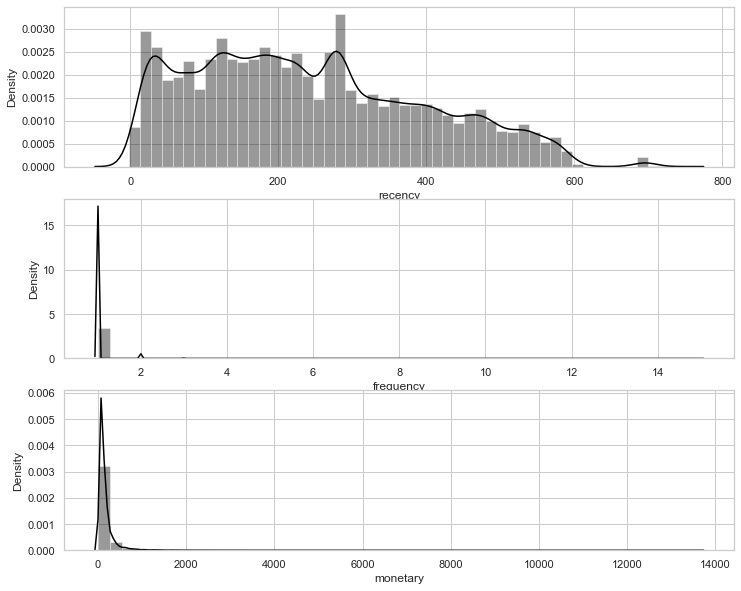

In [107]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(rfm['recency'],color='black')
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(rfm['frequency'],color='black')
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(rfm['monetary'],color='black')
# Show the plot
plt.show()

- 최근성, 빈도 및 화폐의 세 가지 밀도 플롯
- 최근성 첫 번째 플롯에서 대부분의 사용자가 olist에 장기간 머물렀음을 관찰 -> 이는 긍정적이지만 주문 빈도는 적음
- 빈도의 두 번째 플롯에서 대부분의 거래 또는 주문 수는 5보다 작음
- 통화의 세 번째 플롯에서 주어진 기간 동안 최대 지출 금액은 약 1500보다 작음

In [108]:
# Create labels for Recency and Frequency
def partition(x):
    if x < 10:
      return 1
    if 10<=x<=35:
      return 2
    if 35<x<=50:
      return 3
    if 50<x<=75:
      return 4      

rfm['f_quartile']=rfm['frequency'].map(lambda cw : partition(cw) ) 
    
# checking the review score now
rfm.f_quartile.value_counts()
r_labels = range(4, 0, -1);m_labels= range(1,5)

rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, r_labels)
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, m_labels)

In [109]:
rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,recency,frequency,monetary,f_quartile,r_quartile,m_quartile,RFM_Score
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.90,1,4,3,413
0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19,1,4,1,411
0000f46a3911fa3c0805444483337064,541,1,86.22,1,1,2,112
0000f6ccb0745a6a4b88665a16c9f078,325,1,43.62,1,2,1,211
0004aac84e0df4da2b147fca70cf8255,292,1,196.89,1,2,4,214


In [110]:
rfm_count_unique = rfm.groupby('RFM_Score')['RFM_Score'].nunique()
print(rfm_count_unique.sum())
rfm['RFM_Score_s'] = rfm[['r_quartile','f_quartile','m_quartile']].sum(axis=1)
print(rfm['RFM_Score_s'].head())

17
customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    8
0000b849f77a49e4a4ce2b2a4ca5be3f    6
0000f46a3911fa3c0805444483337064    4
0000f6ccb0745a6a4b88665a16c9f078    4
0004aac84e0df4da2b147fca70cf8255    7
Name: RFM_Score_s, dtype: int64


In [112]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score_s'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Score_s'] >= 8) and (df['RFM_Score_s'] < 9)):
        return 'VVIP'
    elif ((df['RFM_Score_s'] >= 7) and (df['RFM_Score_s'] < 8)):
        return 'VIP'
    elif ((df['RFM_Score_s'] >= 6) and (df['RFM_Score_s'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score_s'] >= 5) and (df['RFM_Score_s'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score_s'] >= 4) and (df['RFM_Score_s'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'
# Create a new variable RFM_Level
rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
rfm.head()

,recency,frequency,monetary,f_quartile,r_quartile,m_quartile,RFM_Score,RFM_Score_s,RFM_Level
customer_unique_id,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.90,1,4,3,413,8,VVIP
0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19,1,4,1,411,6,Potential
0000f46a3911fa3c0805444483337064,541,1,86.22,1,1,2,112,4,Needs Attention
0000f6ccb0745a6a4b88665a16c9f078,325,1,43.62,1,2,1,211,4,Needs Attention
0004aac84e0df4da2b147fca70cf8255,292,1,196.89,1,2,4,214,7,VIP


In [113]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = rfm.groupby('RFM_Level').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)
rfm_level_agg.columns = rfm_level_agg.columns.droplevel()

                   recency frequency monetary       
                      mean      mean     mean  count
RFM_Level                                           
Can't Loose Them      62.4       1.1    400.0   6021
Needs Attention      368.1       1.0     62.1  11740
Potential            241.9       1.0    164.7  22927
Promising            300.5       1.0     86.2  17378
Require Activation   459.7       1.0     41.2   6009
VIP                  171.0       1.0    202.0  17347
VVIP                 114.8       1.1    257.0  11974


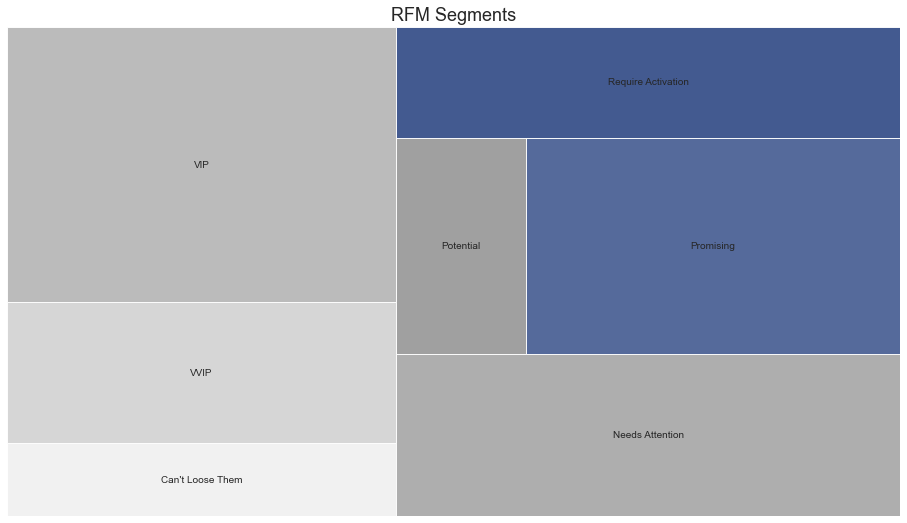

In [115]:
import squarify

rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=['Can\'t Loose Them',
                     'VVIP',
                     'VIP',
                     'Needs Attention',
                     'Potential', 
                     'Promising', 
                     'Require Activation'], alpha=.9,color=['#f0f0f0','#d2d2d2','#b4b4b4','#a5a5a5','#969696','#425a90','#2e4884'])
plt.title("RFM Segments",fontsize=18)
plt.axis('off')
plt.show()

In [116]:
rfm.head()

,recency,frequency,monetary,f_quartile,r_quartile,m_quartile,RFM_Score,RFM_Score_s,RFM_Level
customer_unique_id,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.90,1,4,3,413,8,VVIP
0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19,1,4,1,411,6,Potential
0000f46a3911fa3c0805444483337064,541,1,86.22,1,1,2,112,4,Needs Attention
0000f6ccb0745a6a4b88665a16c9f078,325,1,43.62,1,2,1,211,4,Needs Attention
0004aac84e0df4da2b147fca70cf8255,292,1,196.89,1,2,4,214,7,VIP


**RFM_Score_s에 따라 모든 고객은 7가지 범주로 분류**
- 'Can\'t Loose Them' ====  RMF_Score_s  ≥  9
- 'VVIP' ==== 8 ≤ RMF_Score_s < 9
- 'VIP' ==== 7 ≤ RMF_Score_s <8
- 'Needs Attention' ==== 6 ≤ RMF_Score_s <7
- 'Potential' ==== 5 ≤ RMF_Score_s < 6
- 'Promising' ==== 4 ≤ RMF_Score_s < 5 
- 'Require Activation' RMF_Score_s <4
- 위의 정사각형 플롯에서 가장 높은 비율의 고객은 Potential 범주 영역 내에 있음
- 또한 일부 영역은 파란색 눈금으로 표시되어 있어 더 많은 주의를 요하는 소비자의 비율을 보여줌

- 이 문제를 해결하기 위한 기능으로 RMF_Score_s 또는 RMF_Level을 사용할 수 있음

In [117]:
#saving file 

rfm.to_pickle('rfm.pkl')
df.to_pickle('final.pkl')

- 대상 변수/클래스 레이블이 불균형 -> 모델의 성능 메트릭을 선택할 때 주의

- 상관 관계 매트릭스에서 (payment_value 및 price), (product_weight_g 및 freight_value도 product_width_cm), (product_length_cm 및 product_width_cm), (product_height_cm 및 product_weight_g) 간에 강한 양의 상관 관계가 있음을 발견 -> 그러나 대부분의 기능은 그렇지 않음

- payment_type의 일변량 분석 -> 사용자의 96%가 신용 카드와 boleto를 사용

- consumer_state의 단변량 분석 -> 총 소비자의 42%가 SP(상파울루), 12.9%가 RJ(리우데자네이루), 11.7%가 MG(미나스 제라이스) 출신

- product_category 기능을 분석 -> 2016년과 2018년 사이에 가장 많이 주문된 제품은 bed_bath_table 카테고리, 건강 미용 및 스포츠 레저, 가장 적게 주문된 제품은 security_and_services

- 다양한 타임스탬프 : 2016-18년에 관찰된 총 주문 수는 2017-11년까지 증가하고 그 이후에는 약간 감소
                  월, 일, 시간 -> 2월, 월요일, 오후 시간에 가장 많은 주문

- price, payment_value, freight_value,product_height_cm,product_length_cm와 같은 수치적 특성은 일변량 및 이변량 분석에서 관찰된 바와 같이 이 분류 문제에 도움이 되지 않음

- review_message -> 텍스트의 기본 분석이 수행 -> 가장 빈번한 단어 'o', 'e', 'produto', 'a' 등

- RMF Analyis는 이것에서 새로운 기능을 생성할 수 있는지 여부를 이해하기 위해 수행되었으며 여기서 하나의 숫자 기능 또는 범주형 기능을 추출할 수 있음을 발견
